
#Описание работы:

Передо мной стояла бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, предложено задание для самостоятельной разработки метрики успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.


#Ссылка на данные: https://disk.yandex.ru/d/WdA1cpntTTA79Q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_1 = pd.read_csv('course_contents.csv')
data_2 = pd.read_csv('courses.csv')
data_2 = data_2.rename(columns={'id':'course_id'})
data_3 = pd.read_csv('progress_phases.csv')
data_3 = data_3.rename(columns={'progress_id':'id'})
data_4 = pd.read_csv('progresses.csv')
data_5 = pd.merge(data_1, data_4)
data_6 = pd.merge(data_3, data_5)
data_7 = pd.merge(data_2, data_6)
data_7 = data_7.drop(['Unnamed: 0'], axis=1)
data = data_7
all_title = data['title'].drop_duplicates()
data_1 = data.groupby(['title','module_title']).sum().reset_index()[['title','module_title']].groupby('title').count()
data_3 = data[['title','module_title','lesson_title']].groupby(['title','module_title']).aggregate(lambda x: x.drop_duplicates().count())
data_4 = data_3.groupby(['title']).median()
data_5 = data.groupby(['title','student_id']).sum().reset_index()[['title','student_id']].groupby('title').count()
data_6 = pd.read_csv('students.csv').dropna()
def year(number):
  year = 2019 - int(number[:4])
  month = 7 - int(number[5:7])
  if month < 0:
    year -= 1
  return year
data_6['year'] = data_6['birthday'].map(lambda x:year(x))
data_6 = data_6[(data_6['year'] >= 18) & (data_6['year'] <= 117)]
data_6 = data_6.rename(columns={'id':'student_id'})[['student_id','year']]
data_7 = pd.merge(data, data_6).dropna()[['title','year']]
data

,course_id,title,field,id,module_number,lesson_number,status,start_date,finish_date,module_title,lesson_title,lesson_token,is_video,is_homework,student_id
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,d6b2e7d72e8b5143d0f7a523b6cd3687,2,3,done,2019-07-15 14:27:51.836979+00,2019-07-15 14:27:53.502121+00,Синтаксис языка,"Boolean, операторы сравнения и условные операторы",911a0ad2-d199-4032-800a-f4ddb8d18530,True,False,9f5b2a1edcb6a434bf165fb26053c346
1,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,d6b2e7d72e8b5143d0f7a523b6cd3687,1,4,done,2019-07-15 13:56:43.089871+00,2019-07-15 13:56:48.078132+00,Вводный модуль,Установка среды разработки,0ac58921-5765-40aa-aec9-544f8313e3f6,True,False,9f5b2a1edcb6a434bf165fb26053c346
2,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,d6b2e7d72e8b5143d0f7a523b6cd3687,2,2,done,2019-07-15 14:27:50.037084+00,2019-07-15 14:27:51.817697+00,Синтаксис языка,Переменные в Java,8c2339fd-af56-4676-ad1b-84293d5a68f7,True,False,9f5b2a1edcb6a434bf165fb26053c346
3,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,d6b2e7d72e8b5143d0f7a523b6cd3687,1,6,done,2019-07-15 13:56:54.392164+00,2019-07-15 13:56:59.840598+00,Вводный модуль,Пишем консольное приложение,4169a6a6-37f2-4c0d-8eff-71ad916e2665,True,False,9f5b2a1edcb6a434bf165fb26053c346
4,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,d6b2e7d72e8b5143d0f7a523b6cd3687,2,4,done,2019-07-15 14:27:53.520474+00,2019-07-15 14:27:55.262245+00,Синтаксис языка,Циклы,2a1c95a0-2ad4-441a-a448-9da733a37f32,True,False,9f5b2a1edcb6a434bf165fb26053c346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350672,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,a72a431dd8ec5b78f30f1afc623a6ba9,3,5,done,2019-03-28 10:25:03.213416+00,2019-03-29 10:12:02.095462+00,Объекты и классы,Создание объектов и конструктор,0417f6ea-e67f-4b6c-8cd6-577746aebc83,True,False,e6079cd9d972683bf37a4fee6ae89c54
350673,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,a72a431dd8ec5b78f30f1afc623a6ba9,1,1,done,2018-12-27 17:23:02.13683+00,2019-01-03 20:50:07.191762+00,Вводный модуль,Введение,e15d485d-f3cd-4b1a-a675-59d322c53542,True,False,e6079cd9d972683bf37a4fee6ae89c54
350674,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,a72a431dd8ec5b78f30f1afc623a6ba9,1,4,done,2019-01-03 21:05:15.593197+00,2019-01-03 21:33:44.555003+00,Вводный модуль,Установка среды разработки.,3823b1c5-19d1-4a07-b853-cab98e6f3c6b,True,False,e6079cd9d972683bf37a4fee6ae89c54
350675,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,a72a431dd8ec5b78f30f1afc623a6ba9,3,4,done,2019-03-26 14:28:36.53625+00,2019-03-27 08:02:51.134546+00,Объекты и классы,Статические методы и переменные,d7deb017-a91d-4fad-90ee-88e5a01e2e9f,True,False,e6079cd9d972683bf37a4fee6ae89c54


---------------------------------------------------------------------------------------------------------------------------------------------
#Описательный блок
---------------------------------------------------------------------------------------------------------------------------------------------

#Количество модулей на каждом курсе:

In [ ]:
data_1

,module_title
title,
Excel Базовый,9
Java-разработчик,17
Java-разработчик c нуля,9
JavaScript с нуля,18
PHP-разработчик с 0 до PRO. Часть 1,8
SMM-маркетолог от А до Я,11
UX-дизайн,20
Анимация интерфейсов,21
Веб-вёрстка для начинающих 2.0,8


#Количество уроков в каждом модуле на каждом курсе:

In [ ]:
data_3

lesson_title
title                         module_title                                                    
Excel Базовый                  Визуализация данных Excel                                     5
                              Основной функционал Excel                                     11
                              Основной функционал Excel (продолжение)                        7
                              Сводные таблицы Excel                                          5
                              Формулы и функции Excel. Более сложные формулы                 5
...                                                                                        ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                              5
                              Требовательность digital-продюсера                             4
                              Управление временем                                            4
                              Управление дизайнерами. Разработка дизайна по s...             7
                              Экологичный путь менеджера                                     4

[229 rows x 1 columns]

#Медианное количество уроков в модуле на каждом курсе:

In [ ]:
data_4

,lesson_title
title,
Excel Базовый,1347.0
Java-разработчик,810.0
Java-разработчик c нуля,1289.0
JavaScript с нуля,600.5
PHP-разработчик с 0 до PRO. Часть 1,477.5
SMM-маркетолог от А до Я,340.0
UX-дизайн,251.5
Анимация интерфейсов,119.0
Веб-вёрстка для начинающих 2.0,3085.0


#Количество учеников на каждом курсе:

In [ ]:
data_5

,student_id
title,
Excel Базовый,782
Java-разработчик,763
Java-разработчик c нуля,581
JavaScript с нуля,966
PHP-разработчик с 0 до PRO. Часть 1,854
SMM-маркетолог от А до Я,506
UX-дизайн,1151
Анимация интерфейсов,598
Веб-вёрстка для начинающих 2.0,2004


#Минимальный, максимальный, средний, медианный возраст студентов

In [ ]:
print('Mинимальный возраст:',data_6['year'].min())
print('Mаксимальный возраст:',data_6['year'].max())
print('Cредний возраст:',data_6['year'].mean())
print('Mедианный возраст:',data_6['year'].median())

Mинимальный возраст: 18
Mаксимальный возраст: 100
Cредний возраст: 29.38436722278551
Mедианный возраст: 28.0


#Минимальный возраст студентов на каждом курсе:

In [ ]:
data_7.groupby('title').min()

,year
title,
Excel Базовый,19
Java-разработчик,18
Java-разработчик c нуля,18
JavaScript с нуля,18
PHP-разработчик с 0 до PRO. Часть 1,18
SMM-маркетолог от А до Я,18
UX-дизайн,19
Анимация интерфейсов,19
Веб-вёрстка для начинающих 2.0,18


#Максимальный возраст студентов на каждом курсе:

In [ ]:
data_7.groupby('title').max()

,year
title,
Excel Базовый,60
Java-разработчик,63
Java-разработчик c нуля,54
JavaScript с нуля,58
PHP-разработчик с 0 до PRO. Часть 1,74
SMM-маркетолог от А до Я,51
UX-дизайн,84
Анимация интерфейсов,50
Веб-вёрстка для начинающих 2.0,58


#Средний возраст студентов на каждом курсе:

In [ ]:
data_7.groupby('title').mean()

,year
title,
Excel Базовый,32.450543
Java-разработчик,29.517823
Java-разработчик c нуля,29.339533
JavaScript с нуля,27.595731
PHP-разработчик с 0 до PRO. Часть 1,30.493516
SMM-маркетолог от А до Я,28.031978
UX-дизайн,29.510038
Анимация интерфейсов,28.973637
Веб-вёрстка для начинающих 2.0,27.861893


#Медианный возраст студентов на каждом курсе:

In [ ]:
data_7.groupby('title').median()

,year
title,
Excel Базовый,32.0
Java-разработчик,28.0
Java-разработчик c нуля,28.0
JavaScript с нуля,27.0
PHP-разработчик с 0 до PRO. Часть 1,29.0
SMM-маркетолог от А до Я,27.0
UX-дизайн,29.0
Анимация интерфейсов,28.0
Веб-вёрстка для начинающих 2.0,27.0


#bar-chart, отражающий количество студентов на каждом курсе

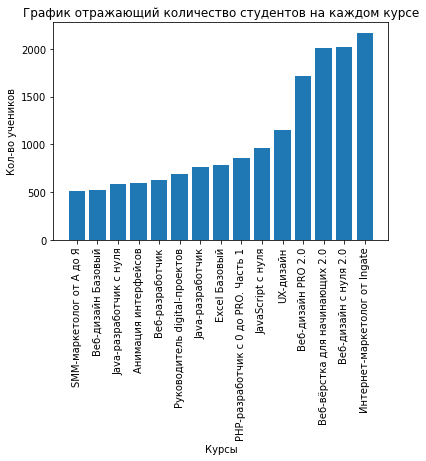

In [ ]:
data_5 = data_5.reset_index().sort_values('student_id')
plt.bar(data_5['title'],data_5['student_id'])
plt.xticks(rotation=90)
plt.title('График отражающий количество студентов на каждом курсе')
plt.xlabel('Курсы')
plt.ylabel('Кол-во учеников')
plt.show()


#bar-chart, отражающий количество студентов на каждом курсе

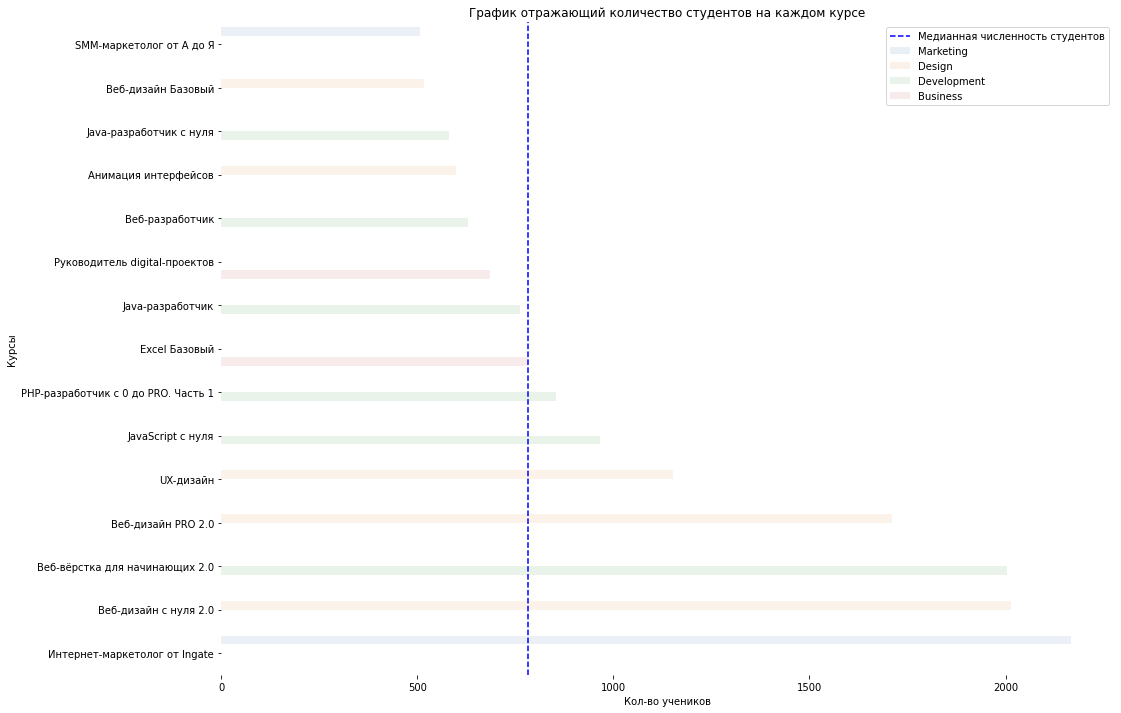

In [ ]:
data_6 = pd.merge(data_5.reset_index(),data[['title','field']].drop_duplicates()).sort_values('student_id')
import seaborn as sns
fix, ax = plt.subplots(figsize = (16,12))
ax = sns.barplot(x = data_6.student_id, y = data_6.title,hue = data_6.field,alpha=0.1)
ax.set_title('График отражающий количество студентов на каждом курсе')
ax.set_xlabel('Кол-во учеников')
ax.set_ylabel('Курсы')
median_line = int(data_6['student_id'].median())
plt.axvline(x=median_line, ls='--', color='blue', label='Медианная численность студентов')
plt.legend()
plt.box(on=None)
plt.show()

# На основании данных графиков я могу сделать вывод, что курс  "Интернет-маркетолог от Ingate" является самым популярным.
# А вот курс "SMM-маркетолог от А до Я" является самым невостребованным из всех курсов.

---------------------------------------------------------------------------------------------------------------------------------------------

# 2. Расчет потенциальной нагрузки на преподавателей






















---------------------------------------------------------------------------------------------------------------------------------------------

#Расчет прироста студентов на каждом курсе в каждом месяце за всю историю

In [ ]:
data_8 = data[(data['start_date'] > '2016-03-01') & (data['start_date'] < '2019-07-31')]
data_8['YearMonth'] = data['start_date'].map(lambda x: x[:7])
year_month = data_8['YearMonth'].drop_duplicates().to_frame()
year_month['is_homework'] = 0
data_9 = data_8
data_8 = data_8[data_8['is_homework'] == 1]
data_10 = data_8.groupby(['title','student_id'])['module_number'].min().reset_index()
data_8 = pd.merge(data_8,data_10)
for title in all_title:
  year_month['title'] = title
  data_8 = data_8.append(year_month)
data_10 = data_8.groupby(['title','YearMonth'])['is_homework'].sum().reset_index()
data_10

,title,YearMonth,is_homework
0,Excel Базовый,2016-03,0
1,Excel Базовый,2016-11,0
2,Excel Базовый,2017-01,0
3,Excel Базовый,2017-02,0
4,Excel Базовый,2017-03,0
...,...,...,...
490,Руководитель digital-проектов,2019-03,36
491,Руководитель digital-проектов,2019-04,17
492,Руководитель digital-проектов,2019-05,25
493,Руководитель digital-проектов,2019-06,15


#line-graph с приростом студентов в каждом месяце для каждого курса
#(15 графиков)

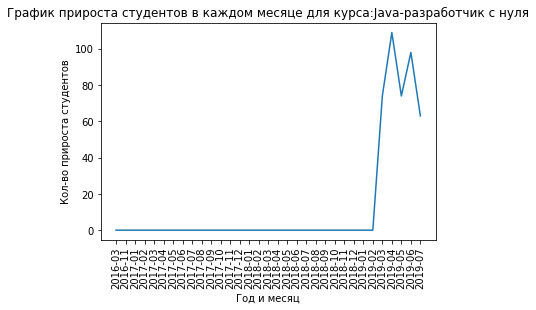

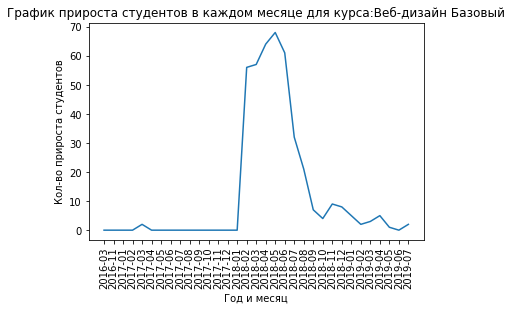

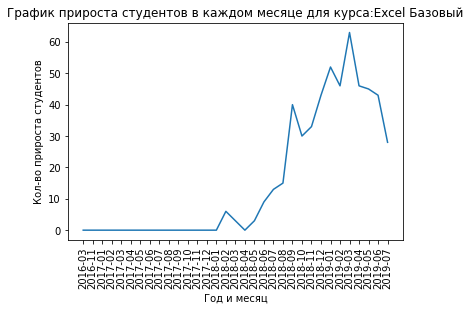

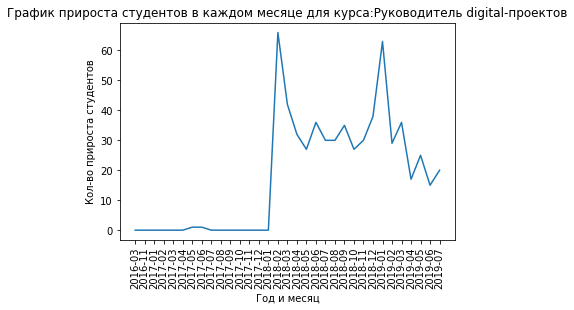

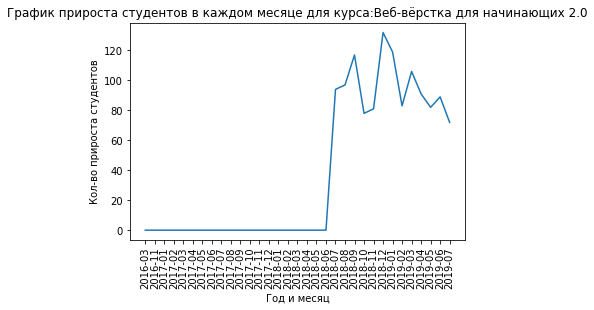

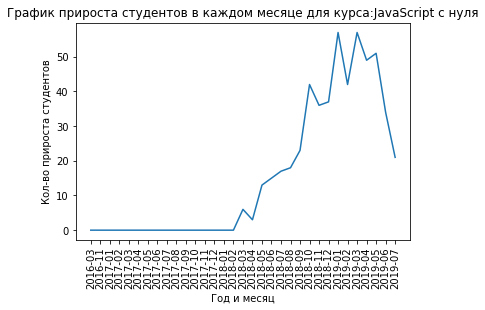

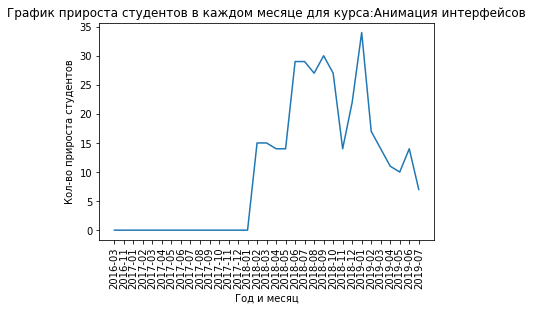

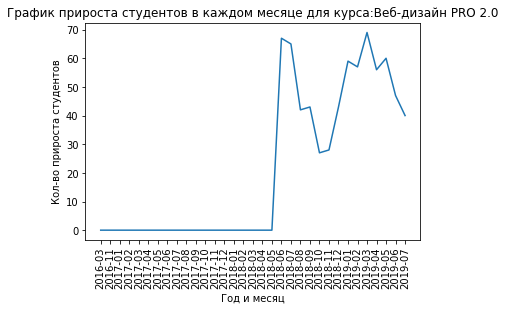

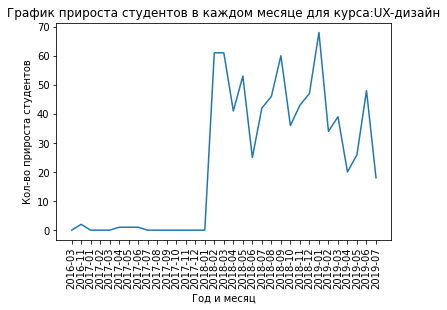

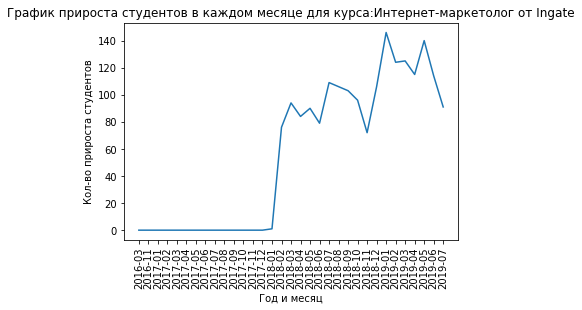

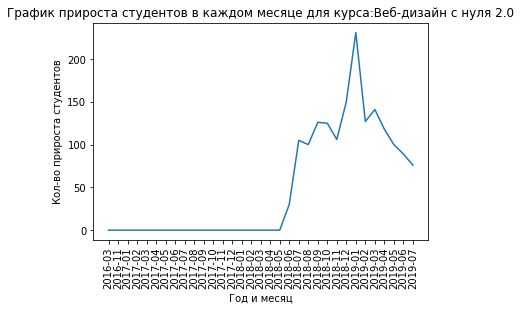

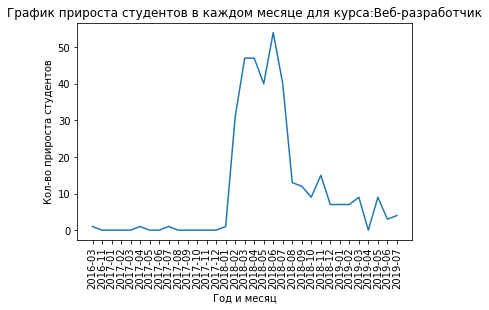

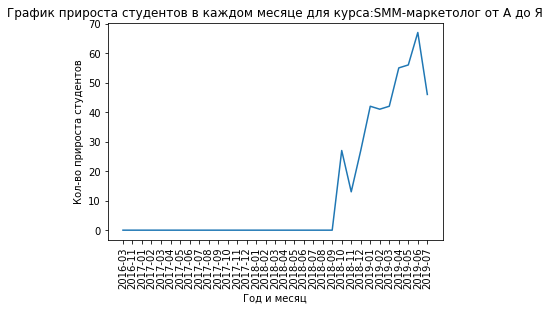

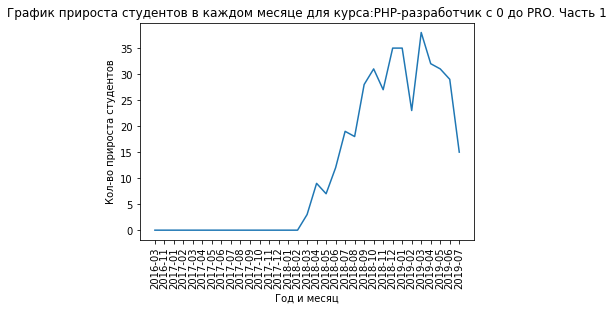

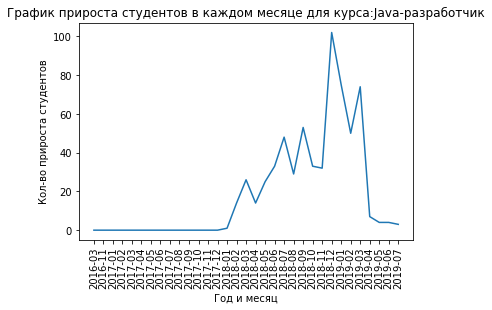

In [ ]:
for title in all_title:
  data_11 = data_10[data_10['title'] == title].groupby('YearMonth').sum()
  plt.plot(data_11)
  plt.title('График прироста студентов в каждом месяце для курса:'+ title)
  plt.xlabel('Год и месяц')
  plt.ylabel('Кол-во прироста студентов')
  plt.xticks(rotation=90)
  plt.show()



#line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса
#(1 график)

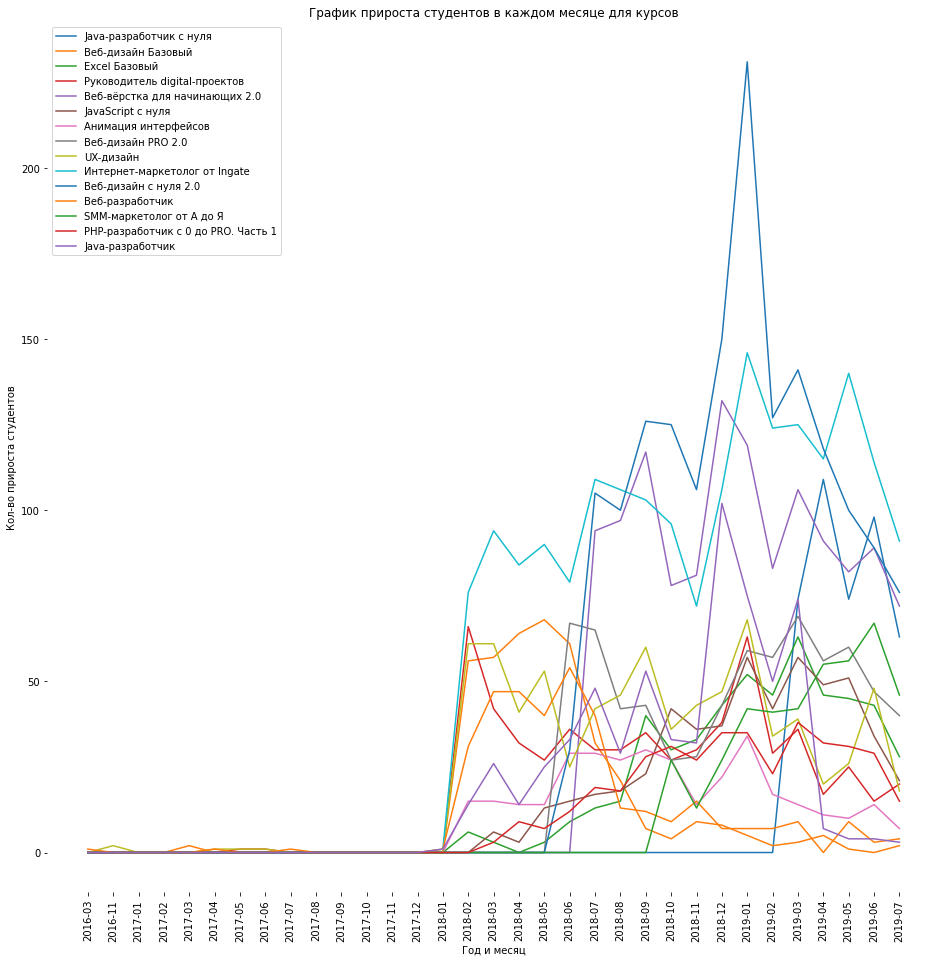

In [ ]:
fix, ax = plt.subplots(figsize = (16,16))
for title in all_title:
  data_11 = data_10[data_10['title'] == title].groupby('YearMonth').sum()
  ax.plot(data_11,label = title)
plt.xticks(rotation = 90)
ax.set_title('График прироста студентов в каждом месяце для курсов')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Кол-во прироста студентов')
plt.legend()
plt.box(on=None)
plt.show()

#Количество прогрессов по выполнению домашних работ в каждом месяце за всю историю

In [ ]:
data_10 = data_9.loc[data_9['is_homework']==True, ['title', 'status', 'start_date', 'finish_date']].copy()
data_10['start_date'] = data_10['start_date'].astype('datetime64[M]')
data_10['finish_date'] = data_10['finish_date'].astype('datetime64[M]') + pd.tseries.offsets.MonthEnd(0)
data_10.loc[data_10['status']=='fail', 'finish_date'] = data_10['start_date'] + pd.tseries.offsets.MonthEnd(0)
data_10.loc[data_10['status']=='start', 'finish_date'] = data_10['finish_date'].max()
data_10.loc[data_10['status']=='wait', 'finish_date'] = data_10['finish_date'].max()
data_10['YearMonth'] = data_10.apply(lambda x: pd.date_range(x['start_date'], x['finish_date'], freq='M').to_list(), axis=1)
data_10 = data_10.explode('YearMonth')
data_10['YearMonth'] = data_10['YearMonth'].map(lambda x: str(x)[:7])
data_10 = data_10[['title','YearMonth']]
data_10['progress'] = 1
year_month = data_9['YearMonth'].drop_duplicates().to_frame()
year_month['progress'] = 0
for title in all_title:
  year_month['title'] = title
  data_10 = data_10.append(year_month)
data_10 = data_10.groupby(['title','YearMonth']).sum().reset_index()
data_10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,title,YearMonth,progress
0,Excel Базовый,2016-03,0
1,Excel Базовый,2016-11,0
2,Excel Базовый,2017-01,0
3,Excel Базовый,2017-02,0
4,Excel Базовый,2017-03,0
...,...,...,...
491,Руководитель digital-проектов,2019-03,635
492,Руководитель digital-проектов,2019-04,564
493,Руководитель digital-проектов,2019-05,587
494,Руководитель digital-проектов,2019-06,556


#line-graph с несколькими линиями,отражающий количество прогрессов по выполнению домашних работ в каждом месяце за всю историю
#(15 графиков)

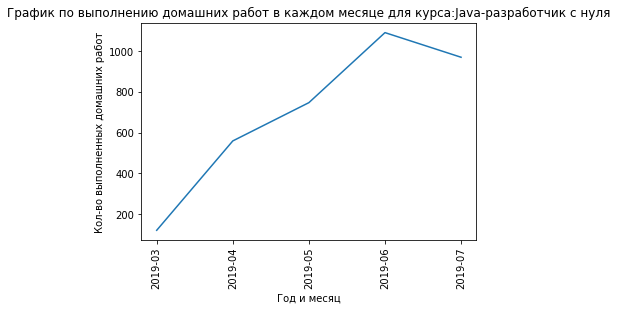

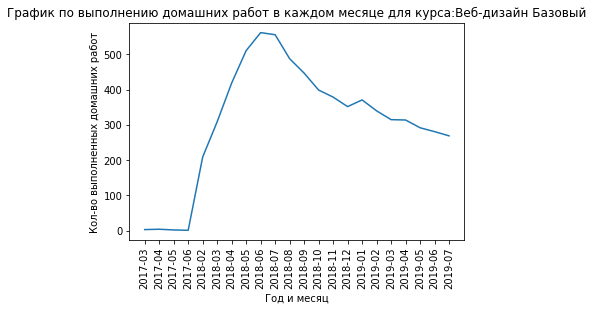

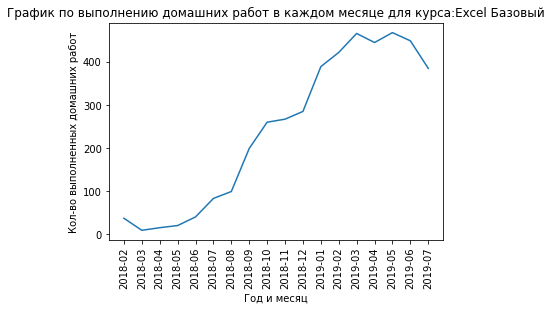

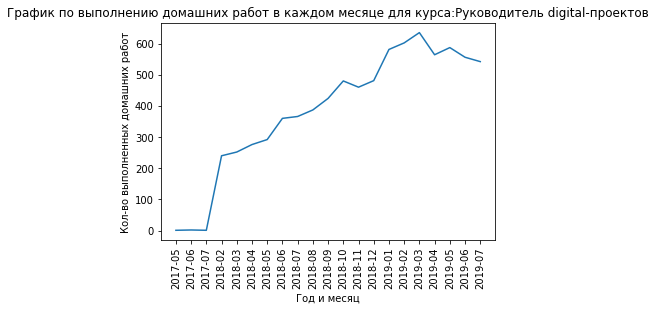

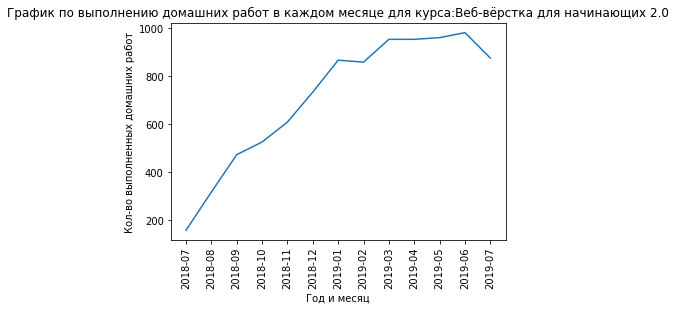

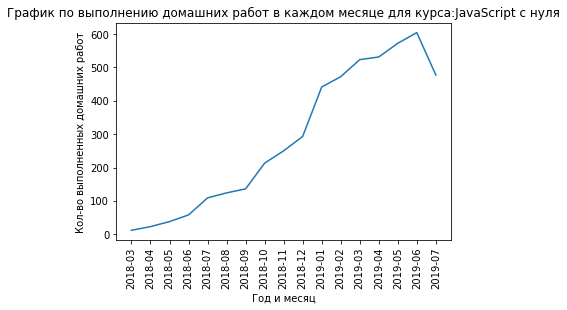

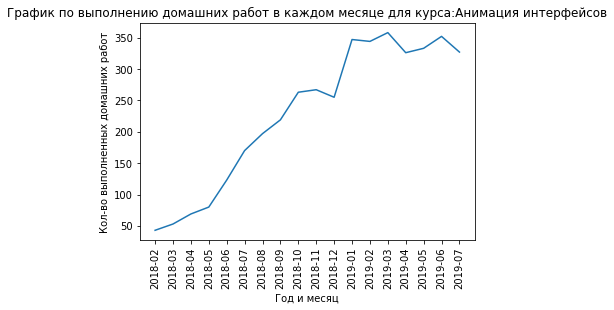

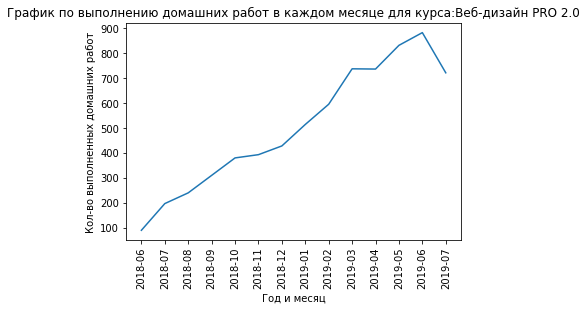

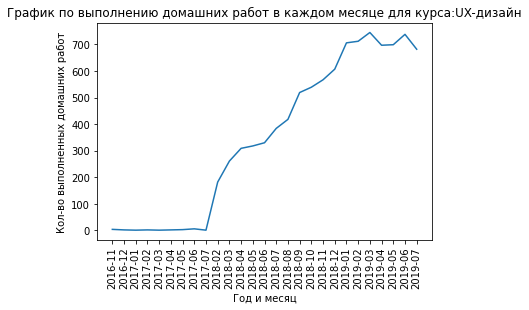

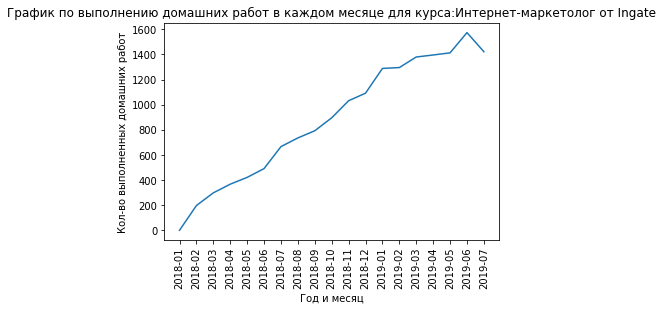

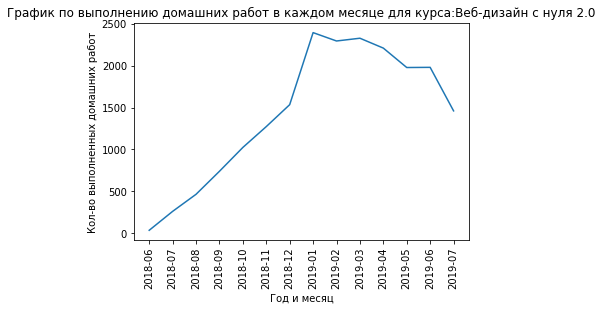

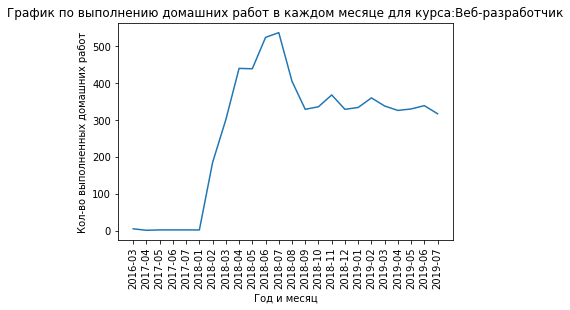

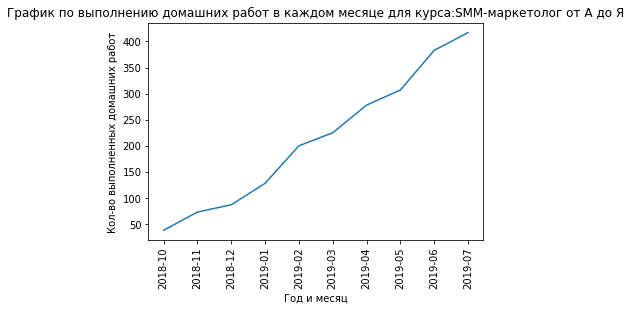

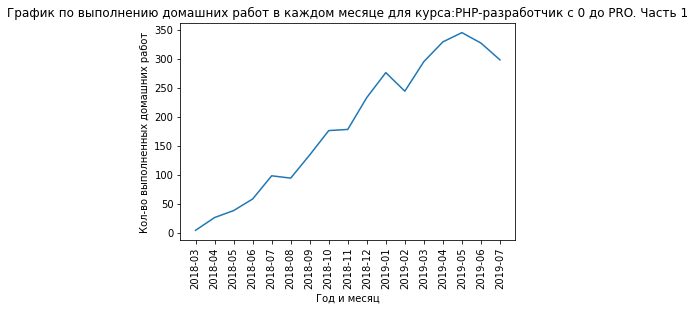

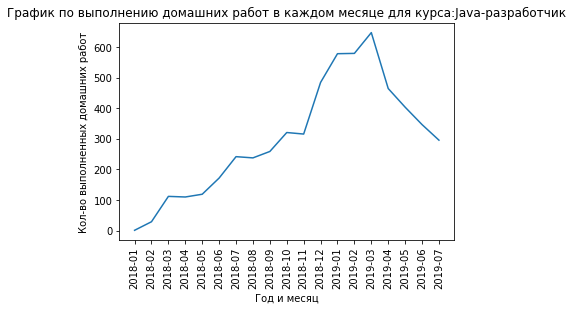

In [ ]:
#5
for title in all_title:
  data_11 = data_10[data_10['title'] == title][['YearMonth','progress']].set_index('YearMonth')
  data_11 = data_11[data_11['progress'] > 0]
  plt.plot(data_11)
  plt.title('График по выполнению домашних работ в каждом месяце для курса:'+ title)
  plt.xlabel('Год и месяц')
  plt.ylabel('Кол-во выполненных домашних работ')
  plt.xticks(rotation=90)
  plt.show()

#line-graph отражающий количество прогрессов по выполнению домашних работ в каждом месяце за всю историю
#(1 график)

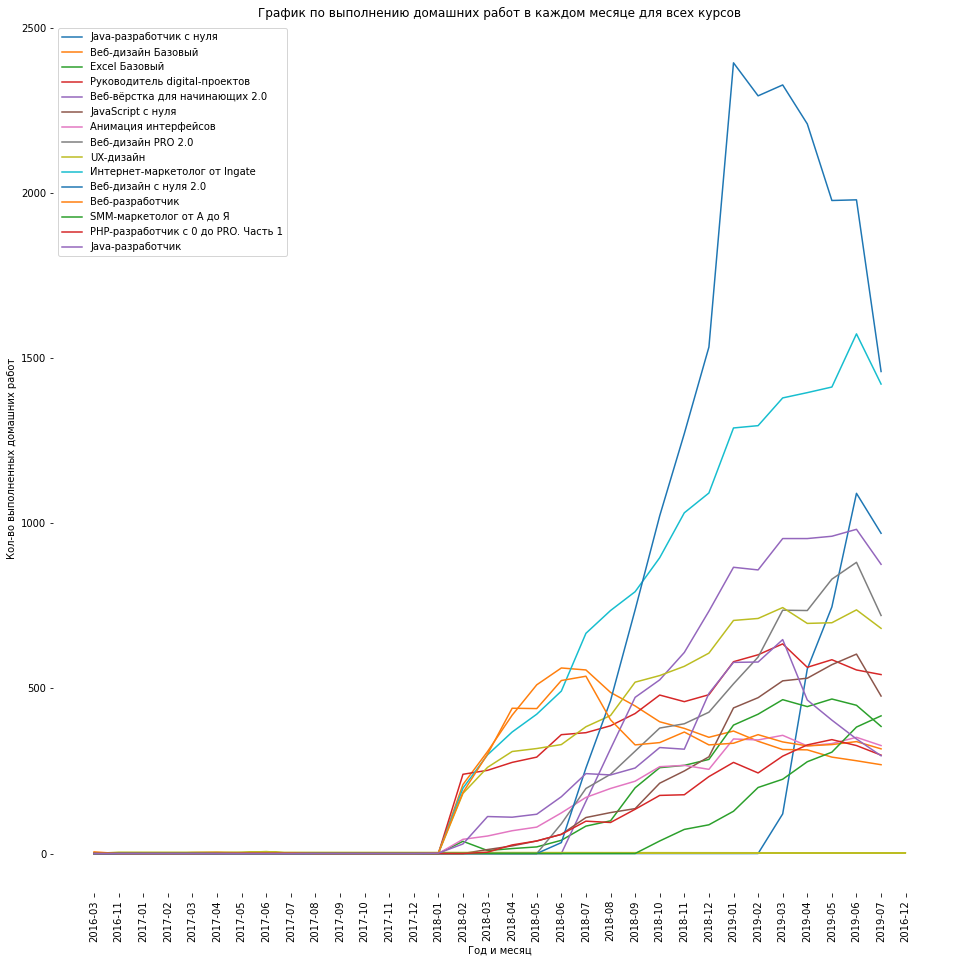

Java-разработчик c нуля
Веб-дизайн Базовый
Excel Базовый
Руководитель digital-проектов
Веб-вёрстка для начинающих 2.0
JavaScript с нуля
Анимация интерфейсов
Веб-дизайн PRO 2.0
UX-дизайн
Интернет-маркетолог от Ingate
Веб-дизайн с нуля 2.0
Веб-разработчик
SMM-маркетолог от А до Я
PHP-разработчик с 0 до PRO. Часть 1
Java-разработчик


In [ ]:
#6
fix, ax = plt.subplots(figsize = (16,16))
for title in all_title:
  data_11 = data_10[data_10['title'] == title][['YearMonth','progress']].set_index('YearMonth')
  ax.plot(data_11,label = title)
plt.xticks(rotation = 90)
ax.set_title('График по выполнению домашних работ в каждом месяце для всех курсов')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Кол-во выполненных домашних работ')
plt.legend()
plt.box(on=None)
plt.show()
for i in all_title:
  print(i)


# На основании данных графиков я могу сделать вывод, что в промежутке с марта 2016 года по январь 2018 прирост бал практически нулевой.
# А вот с января 2018 по июль 2019 наблюдается основной прирост числа пользователей.
# Самым популярными курсом среди всех оказался "Веб-дизайн с нуля 2.0".
# Самым не популярными курсами среди всех оказались "Анимация интерфейсов", "PHP-разработчик с 0 до PRO. Часть 1", "Excel Базовый", "Руководитель digital-проектов" и "Веб-разработчик".
# Нулtвой прирост наблюдается у курса "Веб-дизайн Базовый"
# Пик прироста новых пользователей проходит с июля 2018 по май 2019.
# Спад прироста новых пользователей начался с май 2019 по июль 2019.
# По последнему графику видно что кол-во выполненной домашней работы растет с каждым месяцем это связано с ростом новых пользователей.

---------------------------------------------------------------------------------------------------------------------------------------------
#3. Выявление проблемных модулей
---------------------------------------------------------------------------------------------------------------------------------------------


#Минимальное, максимальное, среднее, медианное время прохождения каждого модуля 

In [ ]:
data_10 = data[data['is_homework']==True].dropna()
data_10['YearMonth'] = data_10['start_date'].map(lambda x: x[:7])
data_10['start_date'] = data_10['start_date'].map(lambda x: int(x[:4])*364 + int(x[5:7])*30 + int(x[8:10]))
data_10['finish_date'] = data_10['finish_date'].map(lambda x: int(x[:4])*364 + int(x[5:7])*30 + int(x[8:10]))
data_10['min'] = data_10['finish_date'] - data_10['start_date']
data_14 = data_10[['title','YearMonth','min']]
data_10 = data_10[['title','module_title','min']]
data_11 = data_10.groupby(['title','module_title']).min()
data_12 = data_10.groupby(['title','module_title']).max()
data_11['max'] = data_12['min']
data_12 = data_10.groupby(['title','module_title']).mean()
data_11['mean'] = data_12['min']
data_12 = data_10.groupby(['title','module_title']).median()
data_11['median'] = data_12['min']
data_13 = data_11.reset_index()
data_11



min  ...  median
title                         module_title                                             ...        
Excel Базовый                  Визуализация данных Excel                            0  ...     5.0
                              Основной функционал Excel                             0  ...     2.0
                              Основной функционал Excel (продолжение)               0  ...     2.0
                              Сводные таблицы Excel                                 0  ...     3.0
                              Формулы и функции Excel. Более сложные формулы        0  ...     3.0
...                                                                               ...  ...     ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                     0  ...     7.0
                              Требовательность digital-продюсера                    0  ...     8.0
                              Управление временем                                   0  ...     4.0
                              Управление дизайнерами. Разработка дизайна по s...    0  ...     8.0
                              Экологичный путь менеджера                            0  ...     3.0

[190 rows x 4 columns]

#line-graph с медианным временем прохождения каждого модуля для каждого курса
#(15 графиков)

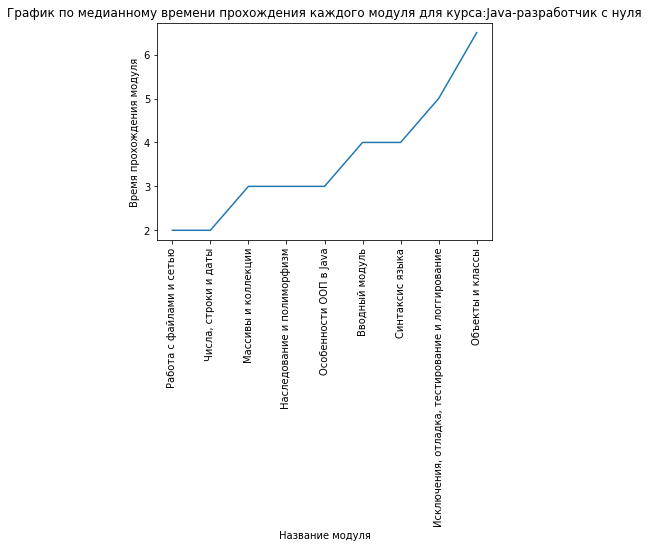

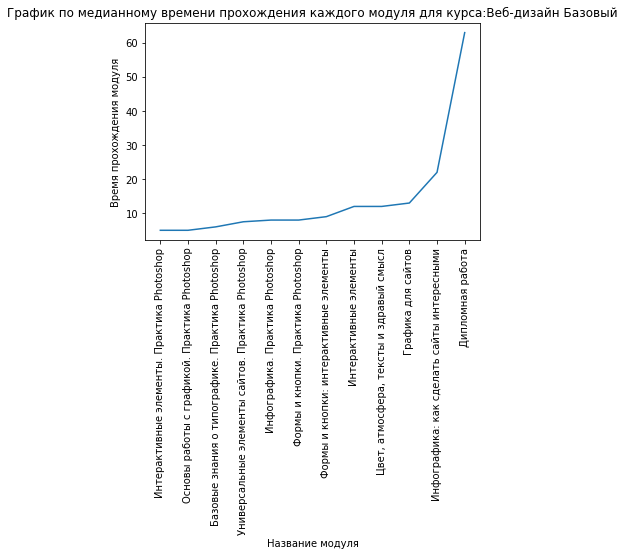

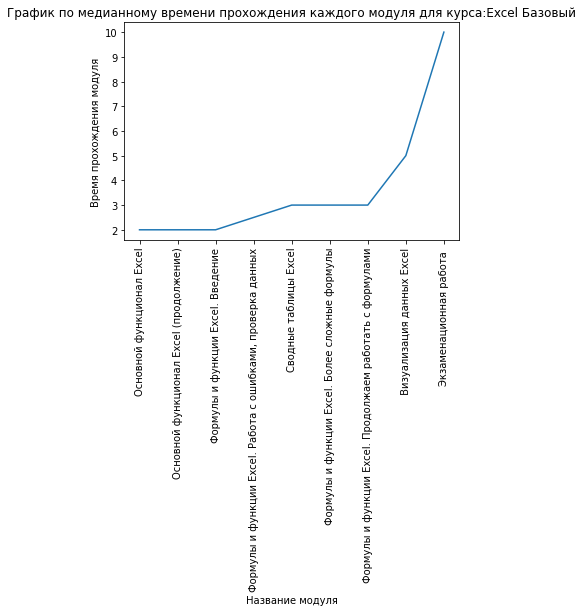

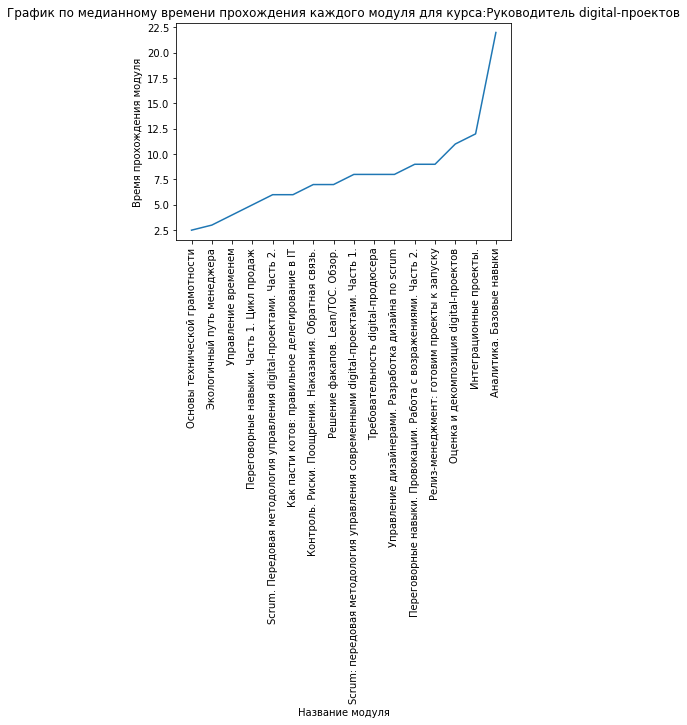

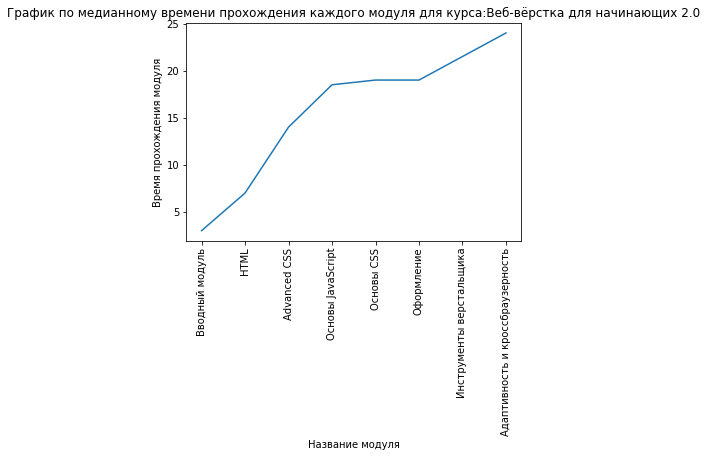

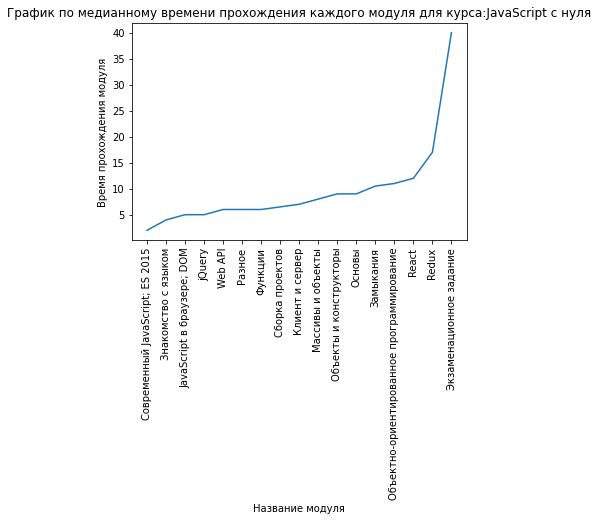

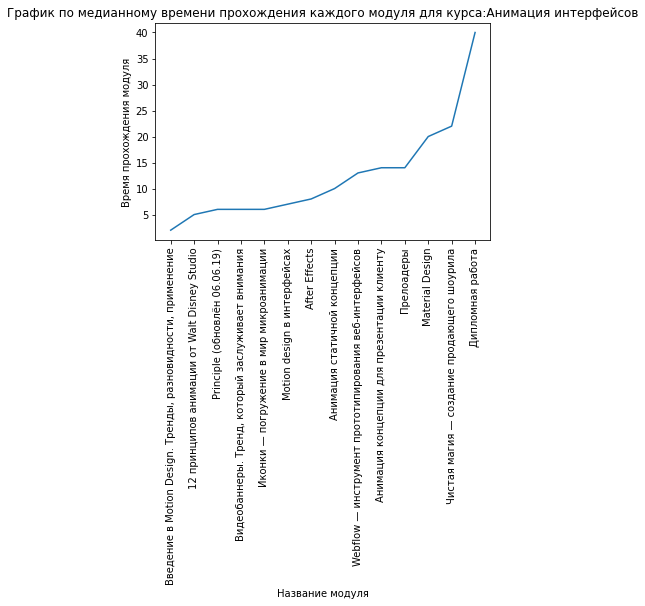

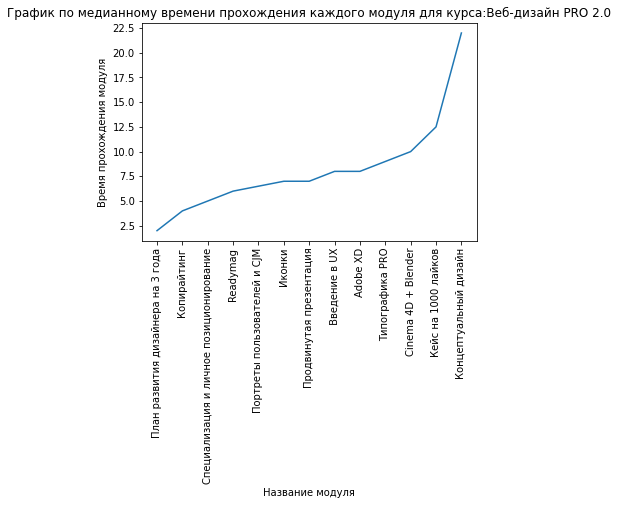

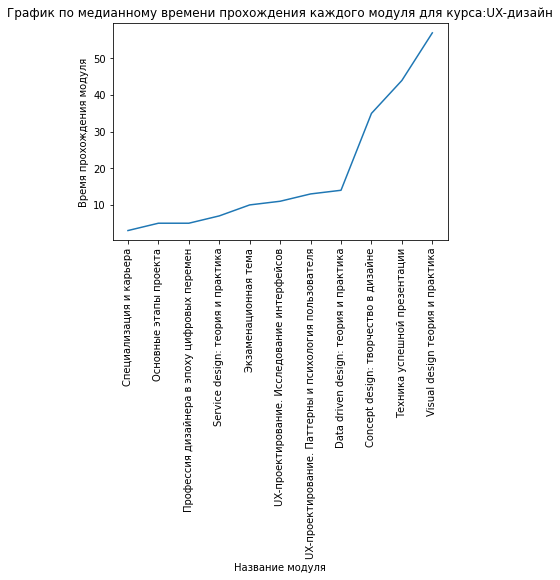

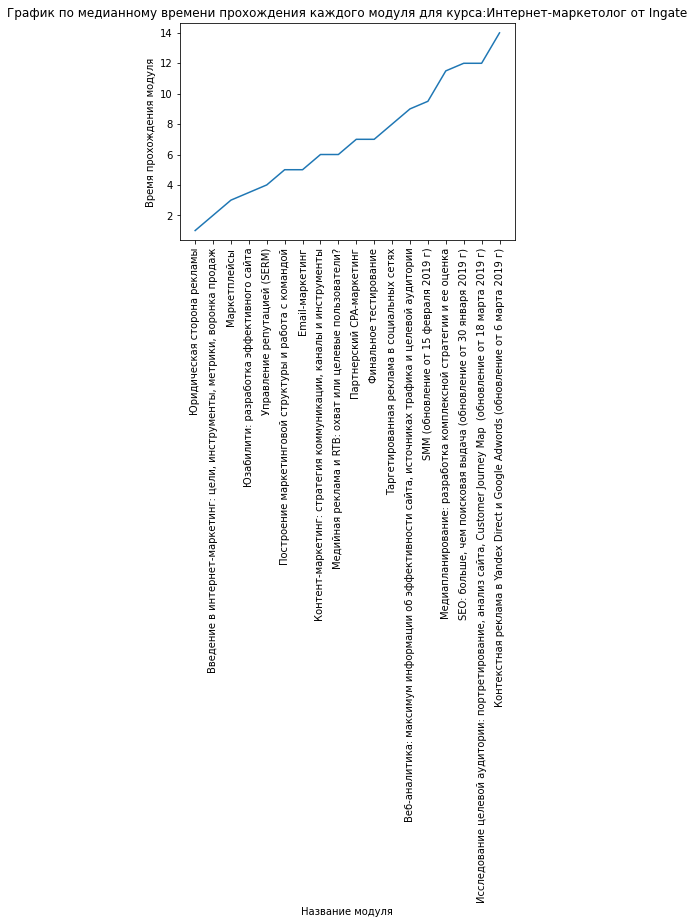

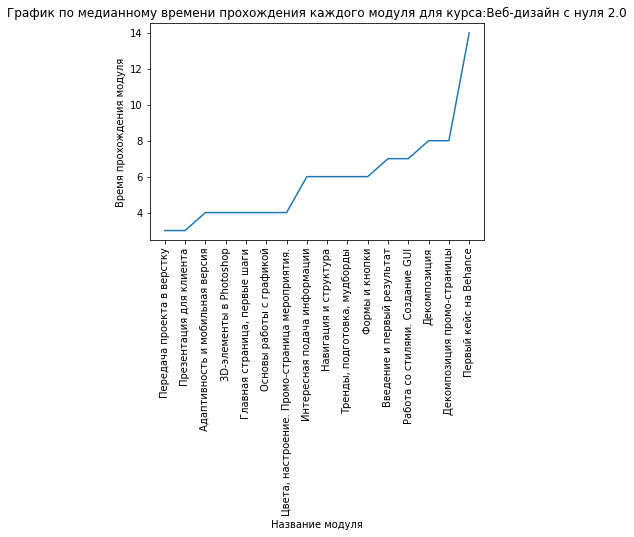

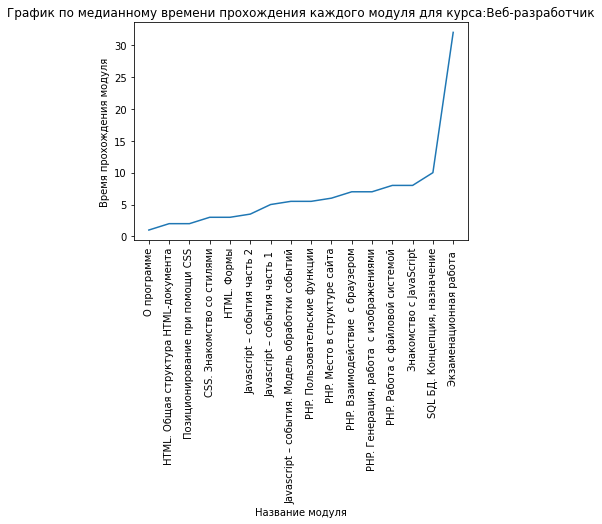

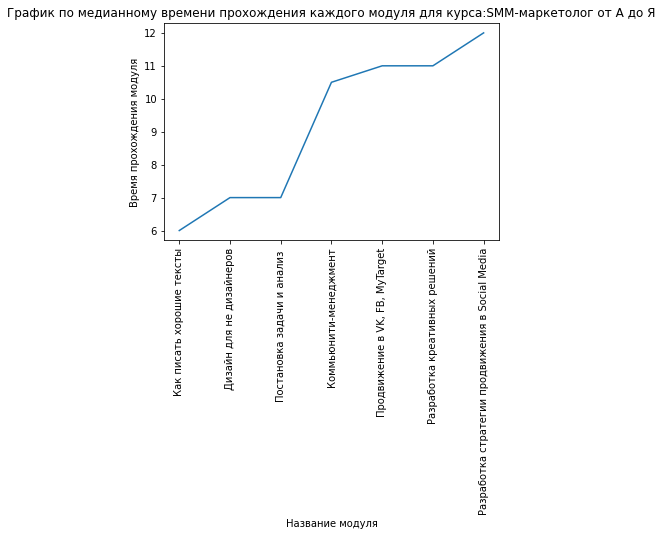

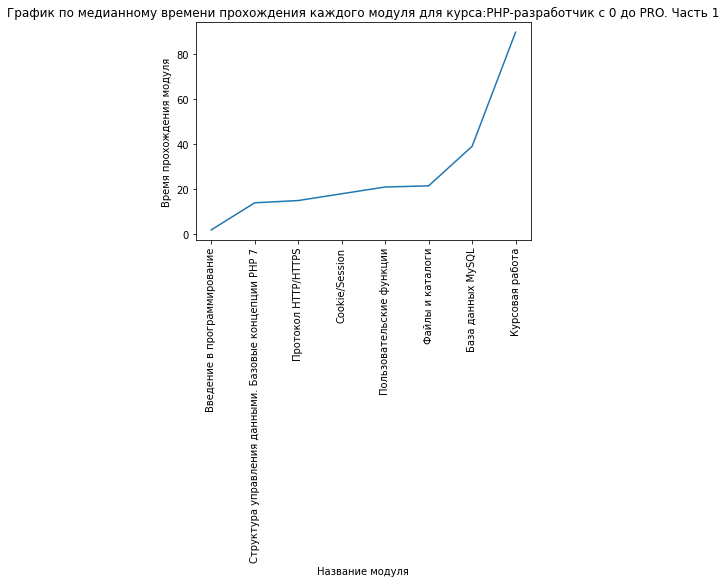

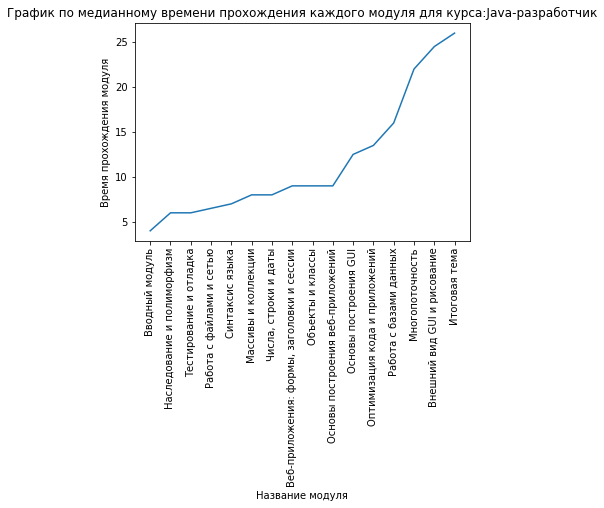

In [ ]:
for title in all_title:
  data_12 = data_13[data_13['title'] == title].sort_values('median')[['module_title','median']].set_index('module_title')
  plt.plot(data_12)
  plt.title('График по медианному времени прохождения каждого модуля для курса:'+ title)
  plt.xlabel('Название модуля')
  plt.ylabel('Время прохождения модуля')
  plt.xticks(rotation=90)
  plt.show()




#Медианное время выполнения домашней работы по месяцам для каждого курса

In [ ]:
data_8 = data
data_8['YearMonth'] = data['start_date'].map(lambda x: x[5:7])
year_month = data_8['YearMonth'].drop_duplicates().to_frame()
year_month['min'] = 0
data_15 = data_14.groupby(['title','YearMonth']).median().reset_index()
data_15['YearMonth'] = data_15['YearMonth'].map(lambda x: x[5:7])
for title in all_title:
  year_month['title'] = title
  data_15 = data_15.append(year_month)
data_15 = data_15.groupby(['title','YearMonth']).max().reset_index()
data_15

,title,YearMonth,min
0,Excel Базовый,01,2.0
1,Excel Базовый,02,3.0
2,Excel Базовый,03,3.0
3,Excel Базовый,04,3.0
4,Excel Базовый,05,3.0
...,...,...,...
175,Руководитель digital-проектов,08,13.0
176,Руководитель digital-проектов,09,10.0
177,Руководитель digital-проектов,10,5.0
178,Руководитель digital-проектов,11,6.0


#line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам
#(1 график)

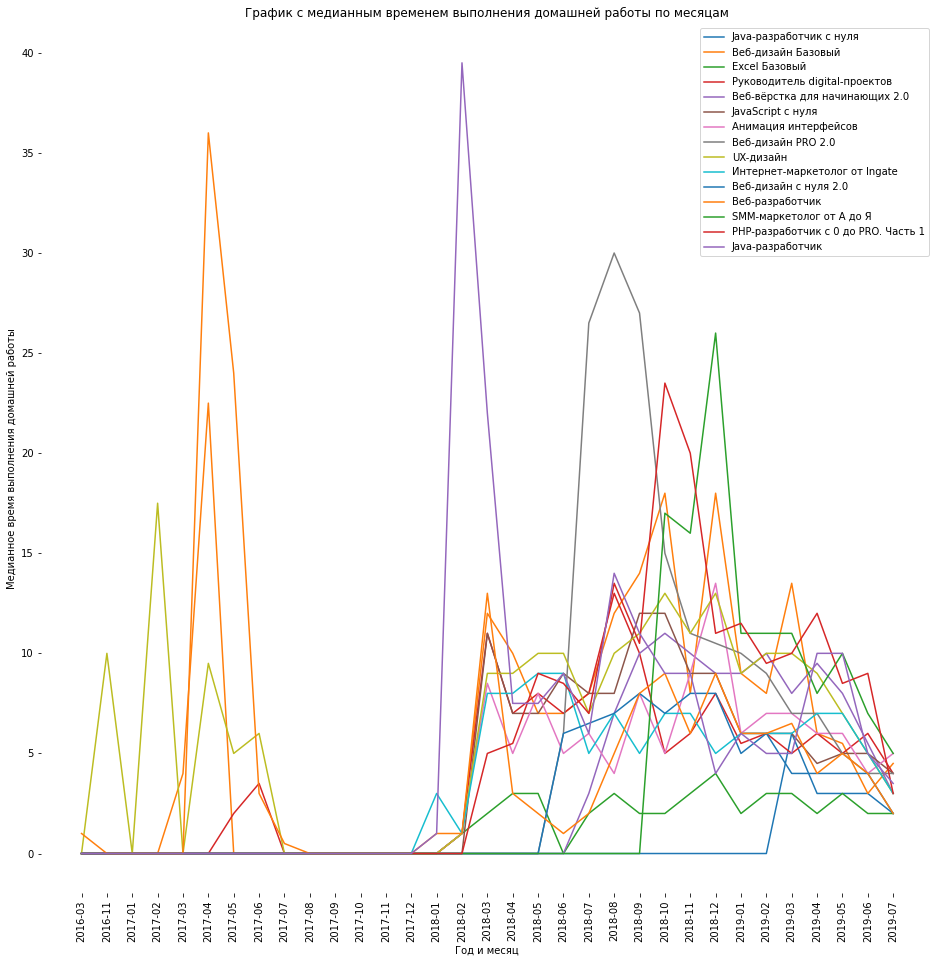

In [ ]:
fix, ax = plt.subplots(figsize = (16,16))
for title in all_title:
  data_16 = data_15[data_15['title'] == title].set_index('YearMonth')['min']
  ax.plot(data_16,label = title)
plt.xticks(rotation = 90)
ax.set_title('График с медианным временем выполнения домашней работы по месяцам')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Медианное время выполнения домашней работы')
plt.legend()
plt.box(on=None)
plt.show()



# По последнему графику можно сделать вывод, что медианное время от марта 2016 до июня 2019 в среднем уменьшается.
# По первым 15 графикам можем заметить, что медианное время может значительно отличаться у разных курсов.
# Можно сделать вывод, что сложность разных модулей может значительно отличатьсяю


---------------------------------------------------------------------------------------------------------------------------------------------
# 4. Расчет конверсии
---------------------------------------------------------------------------------------------------------------------------------------------

#Конверсия перехода студентов из одного модуля в другой на каждом курсе

In [ ]:
data_1 = data[data['is_homework']==1].groupby(['title','module_title'])['student_id'].nunique().to_frame().reset_index()
data_2 = data[data['status']=='done'][data['is_homework']==1].groupby(['title','module_title'])['student_id'].nunique().to_frame().reset_index()
data_1['student_id_2'] = data_2['student_id']
data_3 = pd.DataFrame()
for title in all_title:
  data_2 = data_1[data_1['title'] == title]
  data_2 = data_2.sort_values(by=['title','student_id_2'],ascending=False)
  data_2.student_id_2 = data_2.student_id_2.shift(+1)
  data_2['percent'] = round(data_2['student_id'] / data_2['student_id_2'],2)
  data_2 = data_2.fillna(0)
  data_3 = data_3.append(data_2)
data_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,title,module_title,student_id,student_id_2,percent
25,Java-разработчик c нуля,Вводный модуль,418,0.0,0.00
32,Java-разработчик c нуля,Синтаксис языка,279,283.0,0.99
33,Java-разработчик c нуля,"Числа, строки и даты",162,221.0,0.73
29,Java-разработчик c нуля,Объекты и классы,211,151.0,1.40
27,Java-разработчик c нуля,Массивы и коллекции,106,150.0,0.71
...,...,...,...,...,...
14,Java-разработчик,Многопоточность,52,51.0,1.02
17,Java-разработчик,Оптимизация кода и приложений,33,31.0,1.06
19,Java-разработчик,Основы построения веб-приложений,25,26.0,0.96
10,Java-разработчик,"Веб-приложения: формы, заголовки и сессии",24,23.0,1.04


#bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе

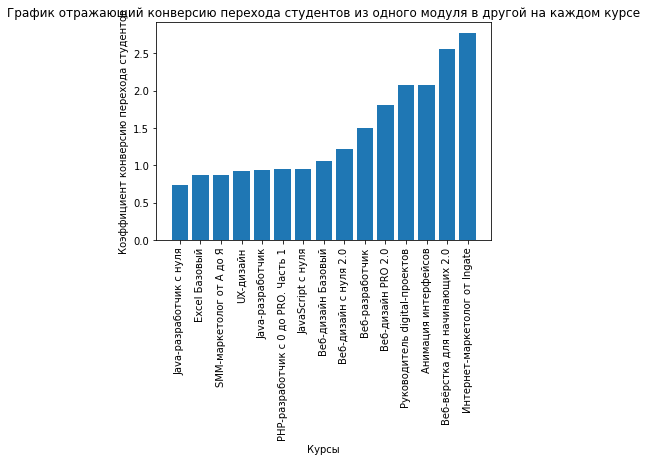

In [ ]:
data_12 = data_3.groupby('title')['percent'].mean().reset_index().sort_values('percent')
plt.bar(data_12['title'],data_12['percent'])
plt.xticks(rotation=90)
plt.title('График отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе')
plt.xlabel('Курсы')
plt.ylabel('Коэффициент конверсию перехода студентов')
plt.show()

#bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе

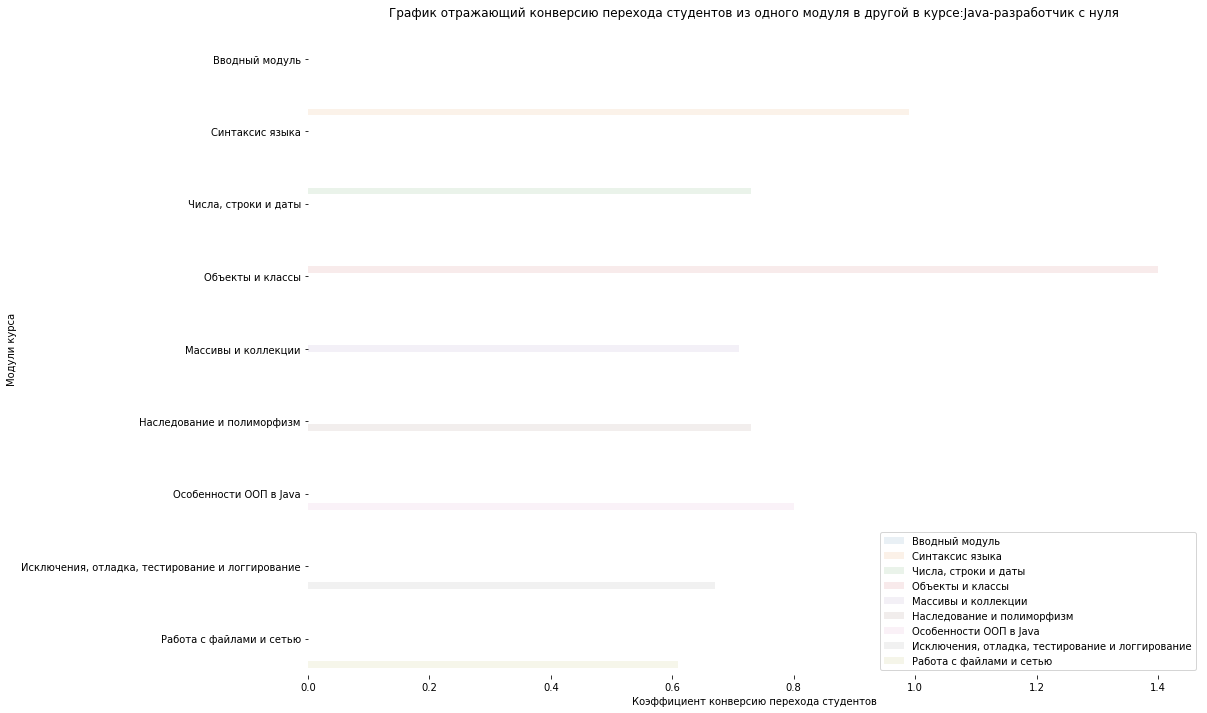

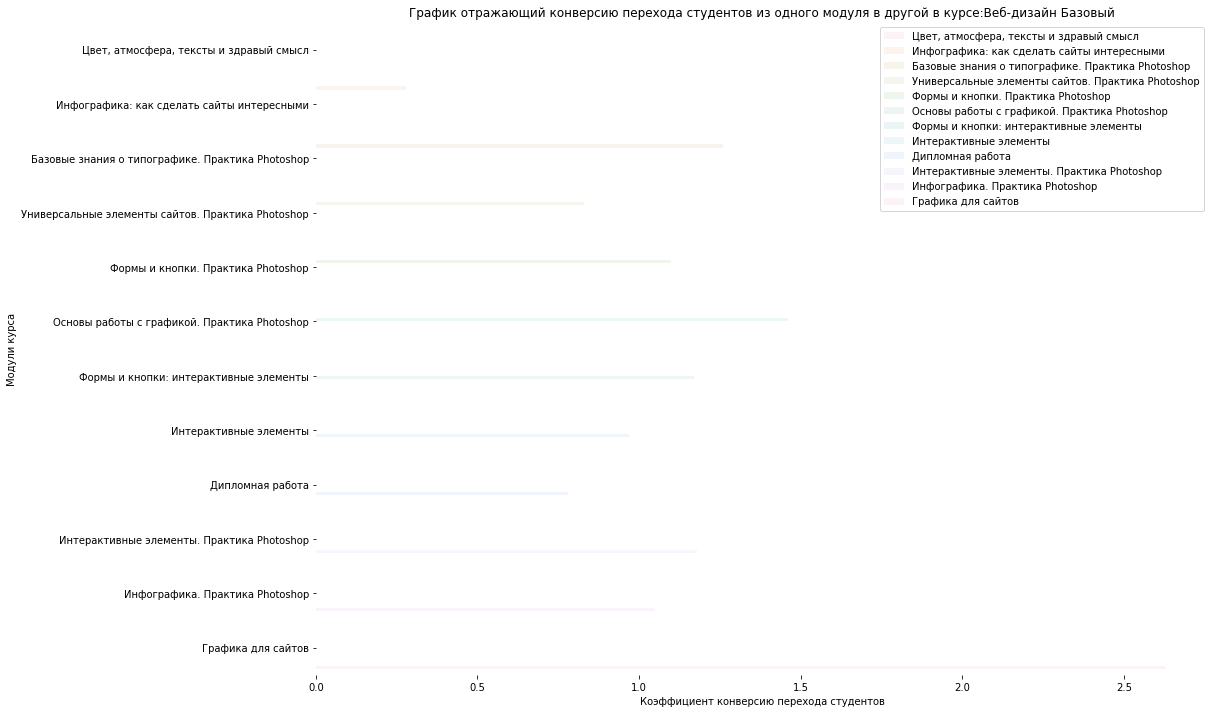

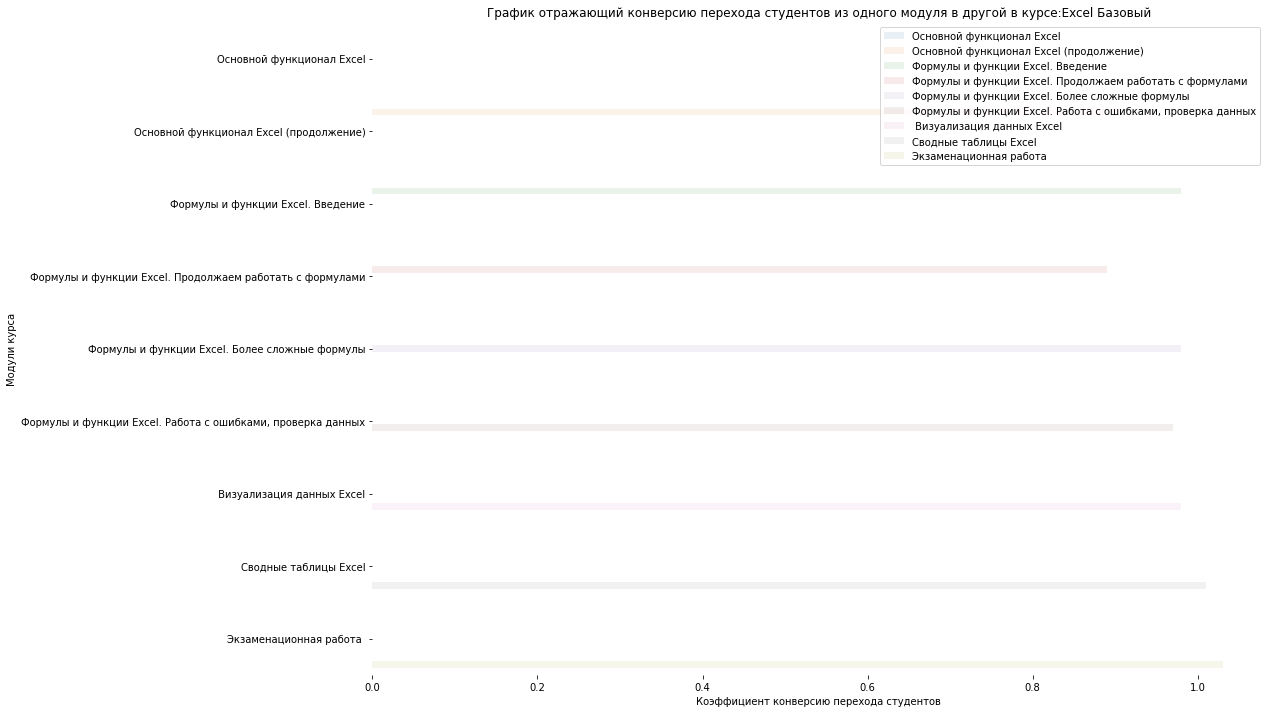

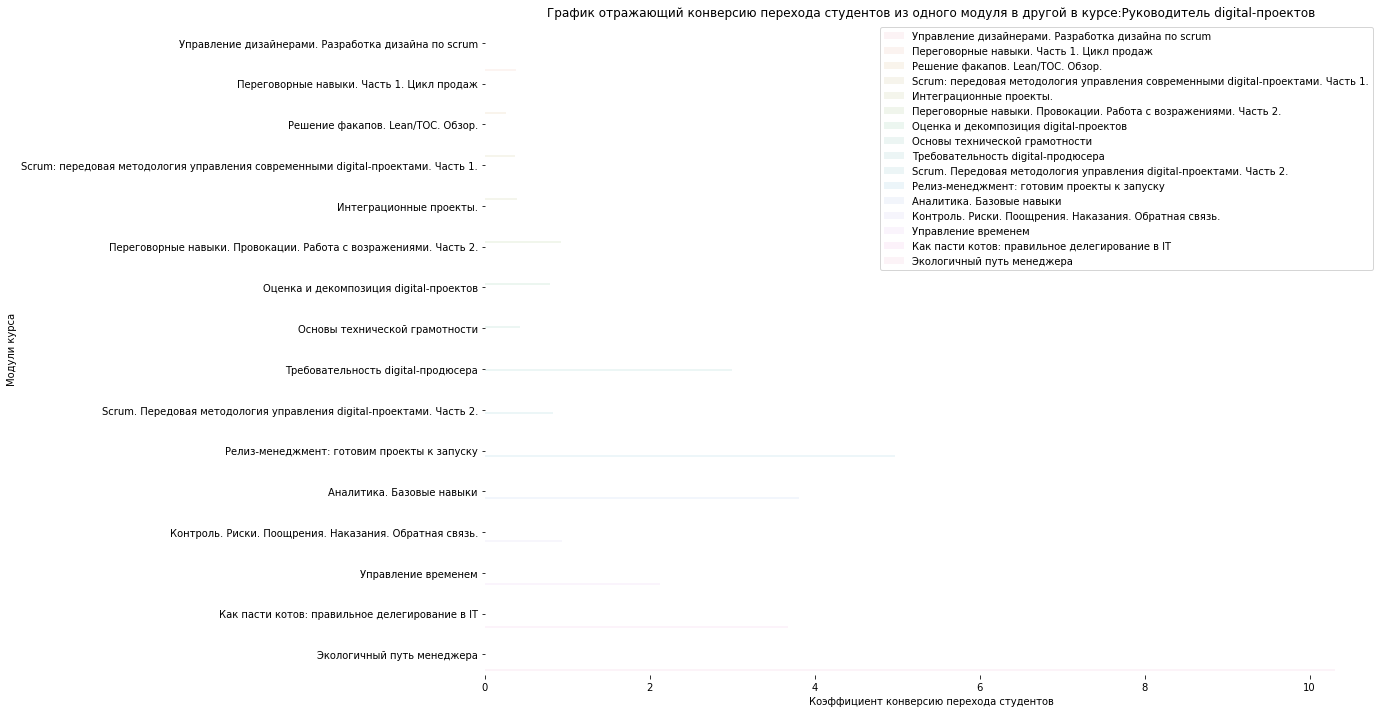

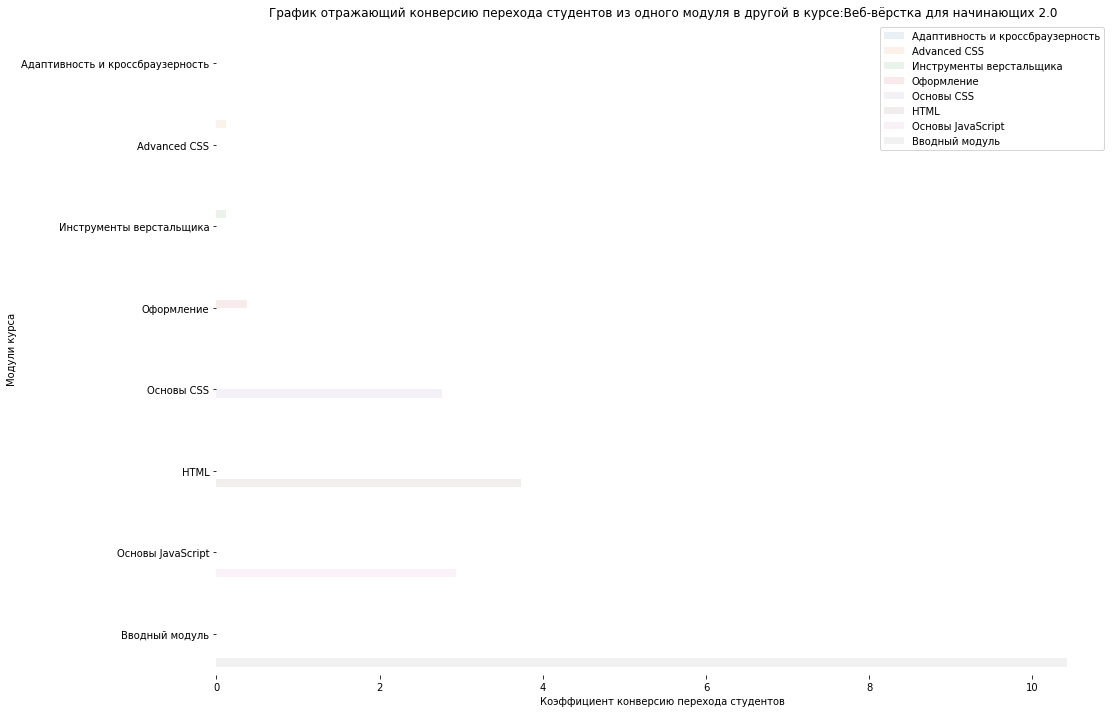

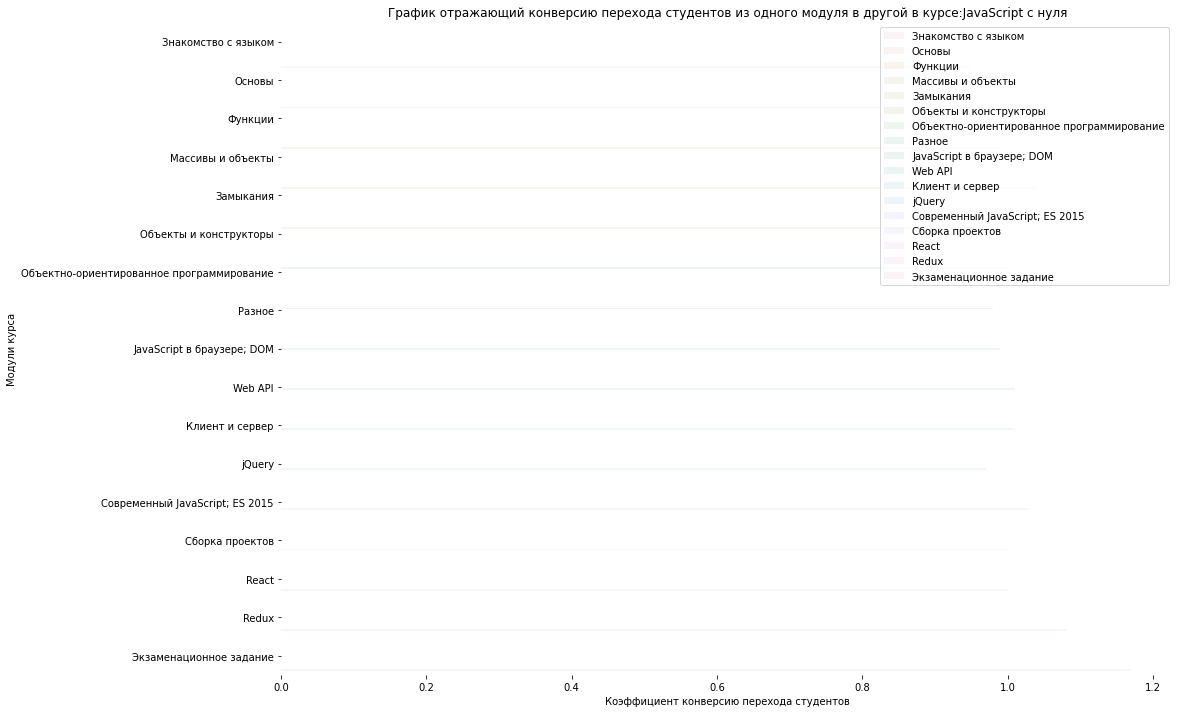

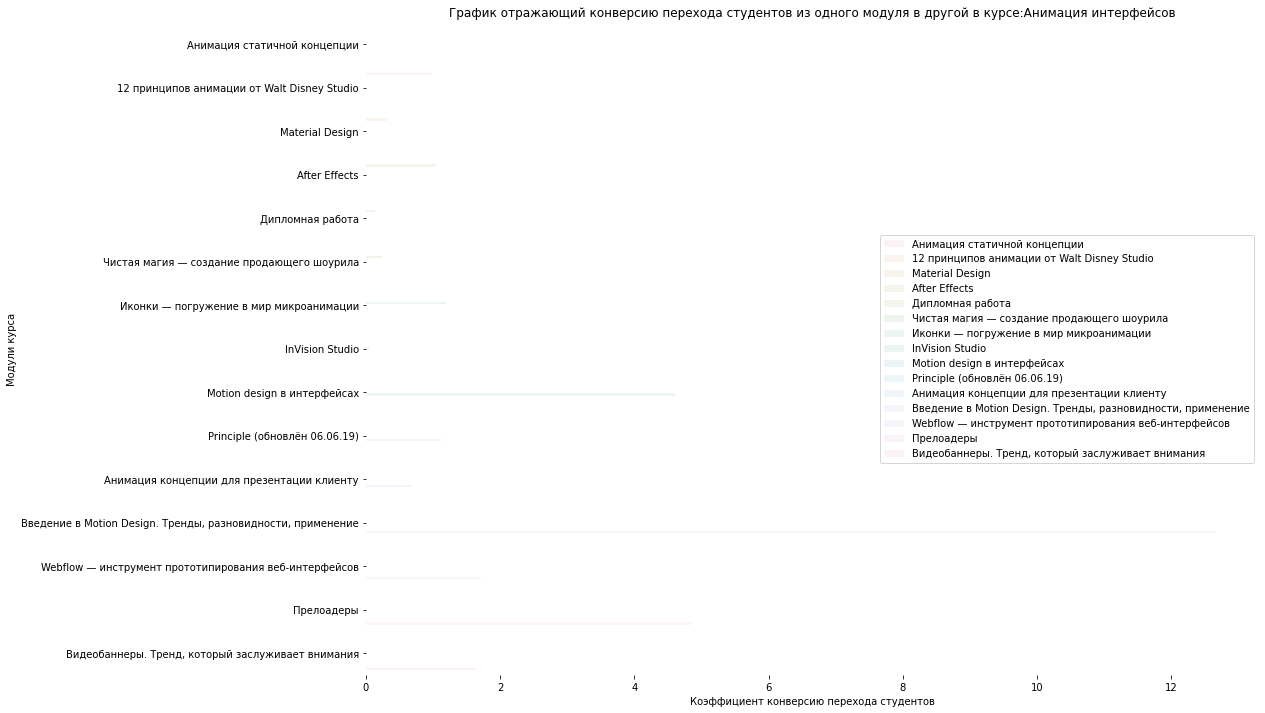

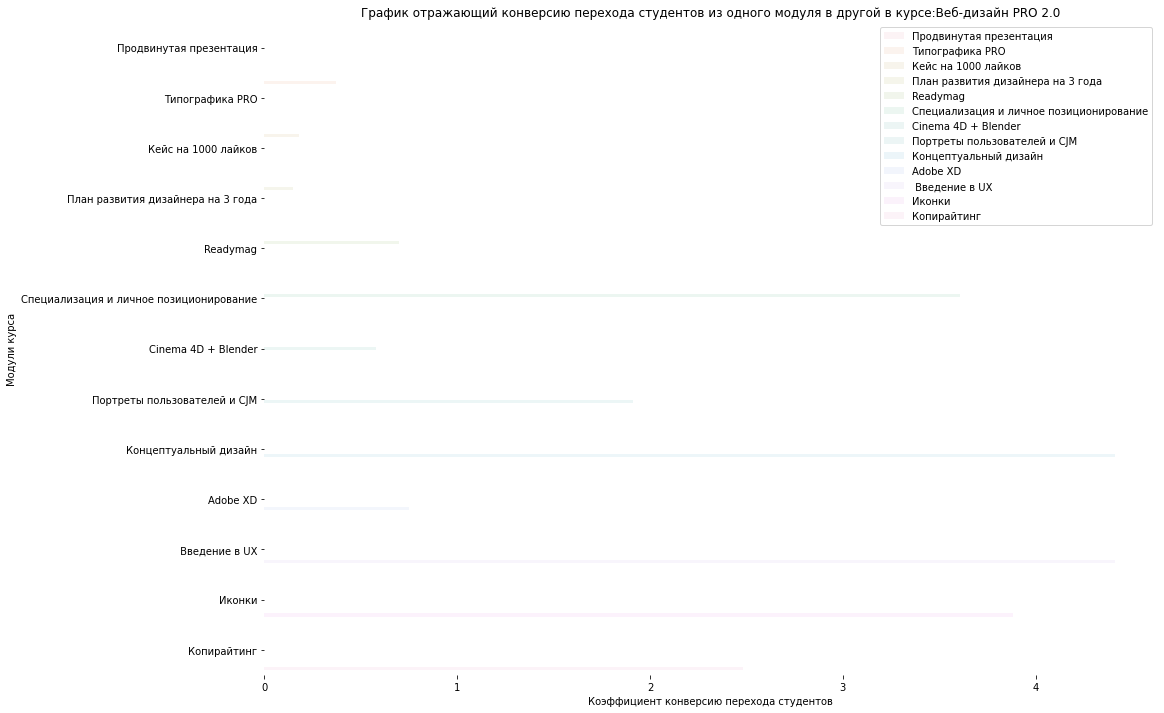

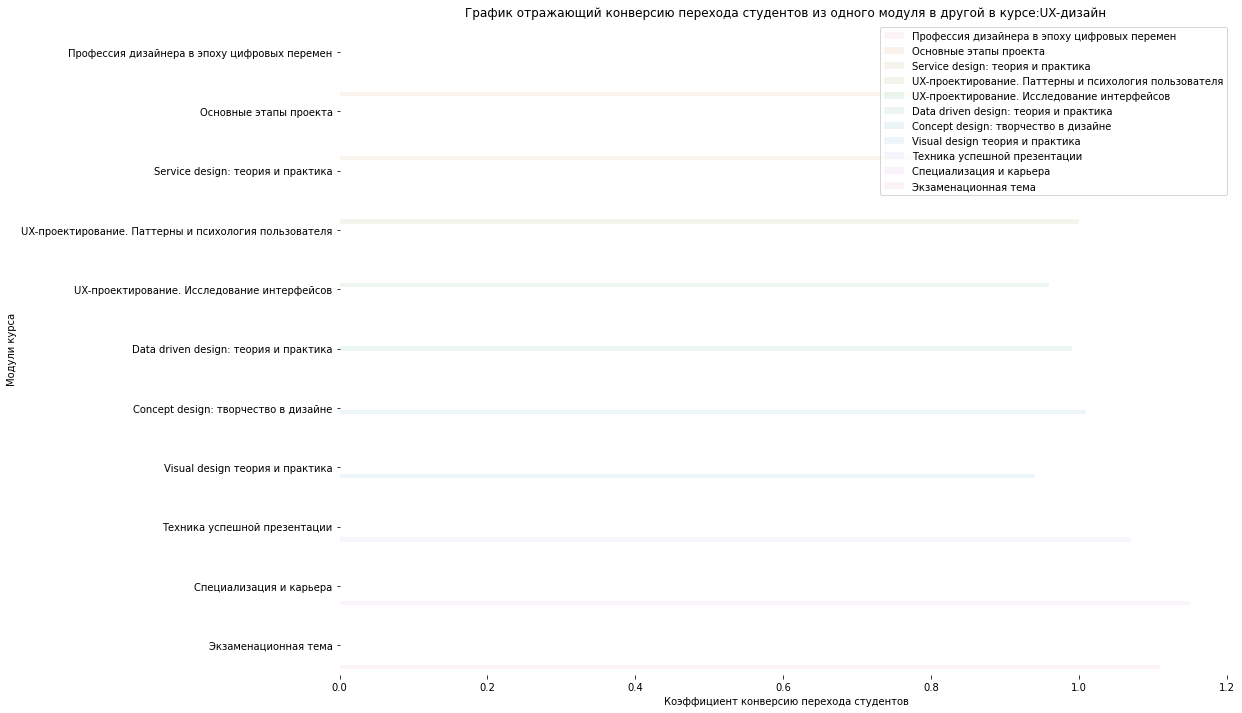

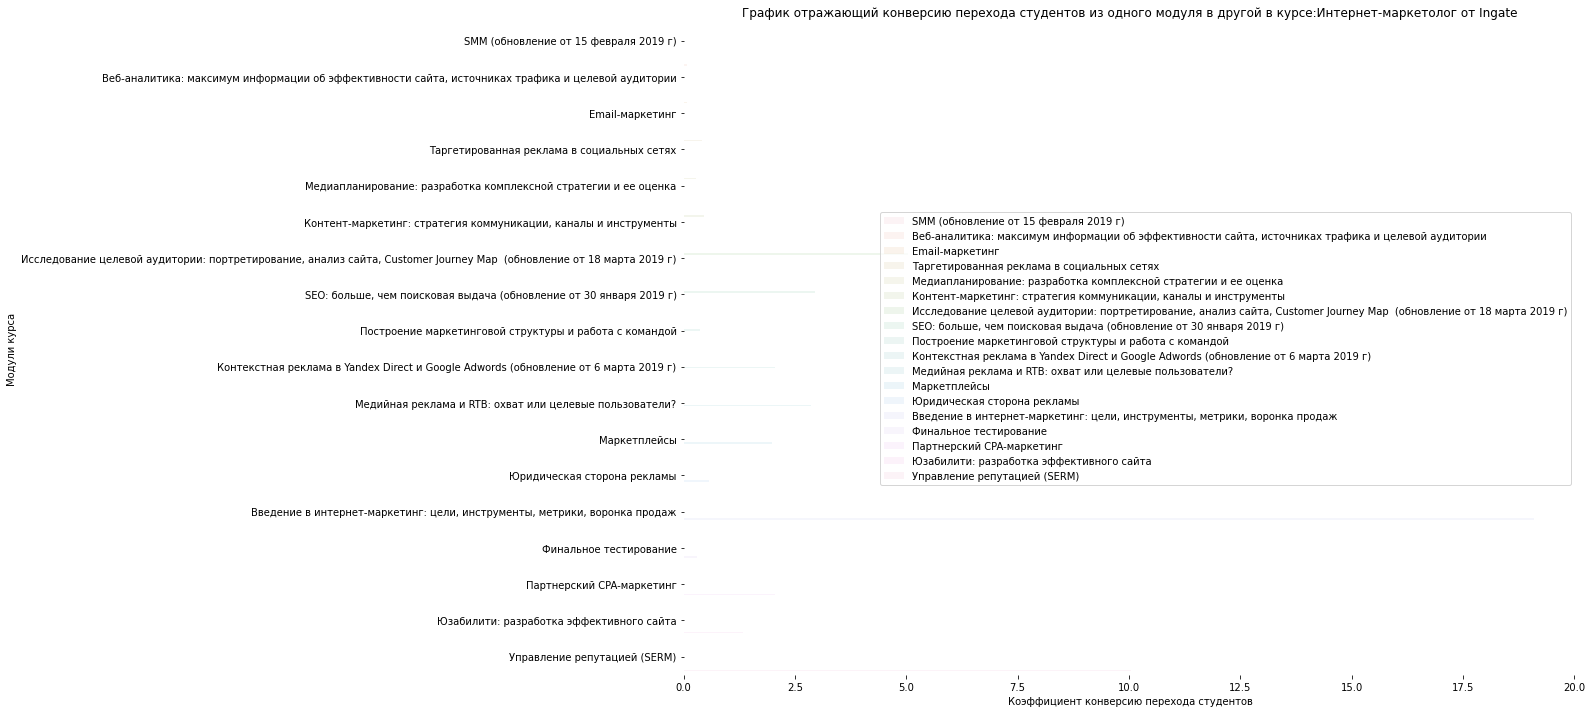

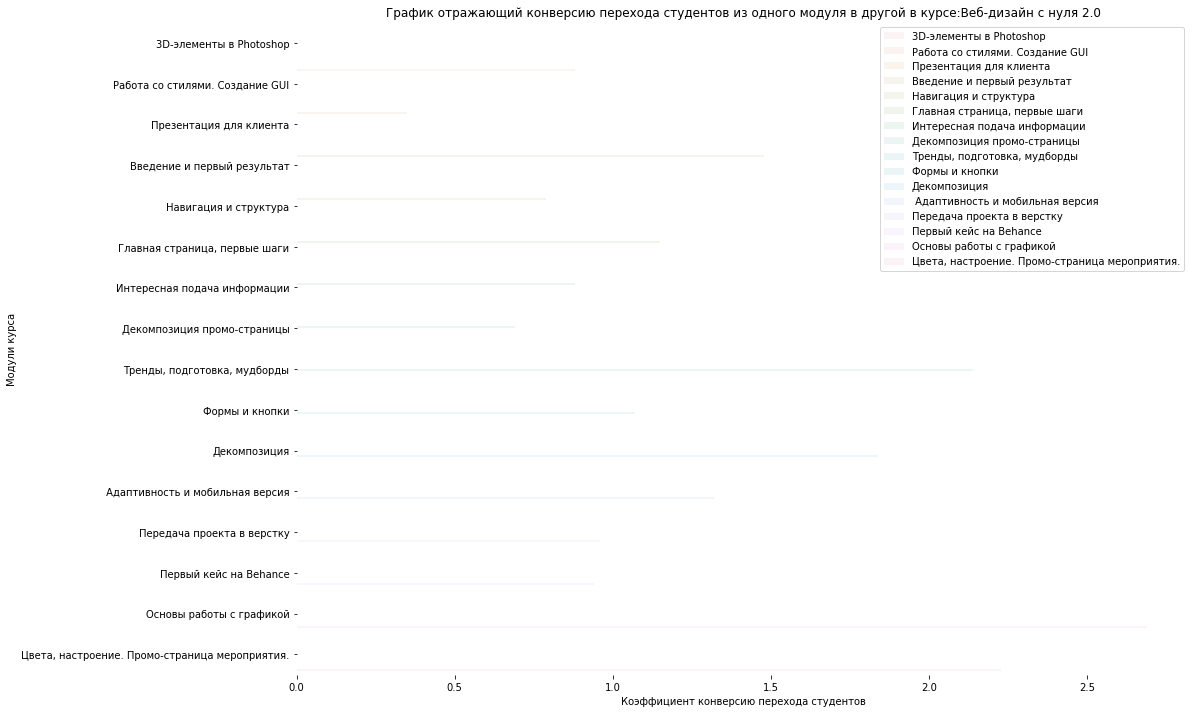

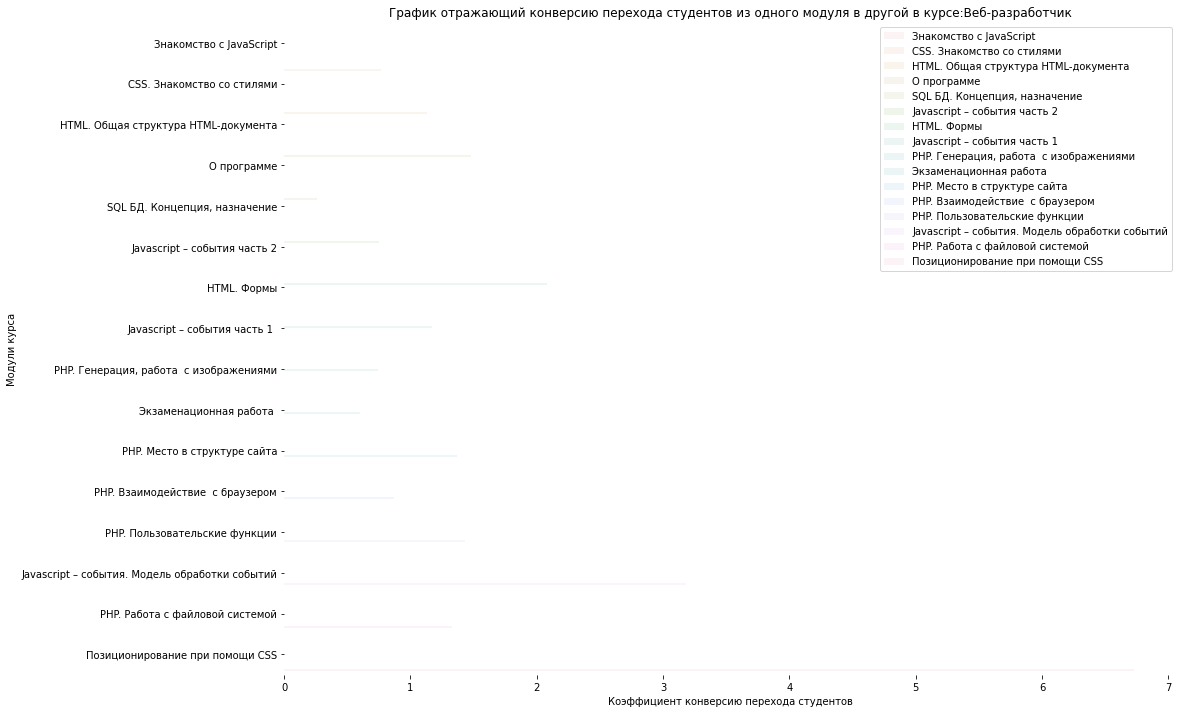

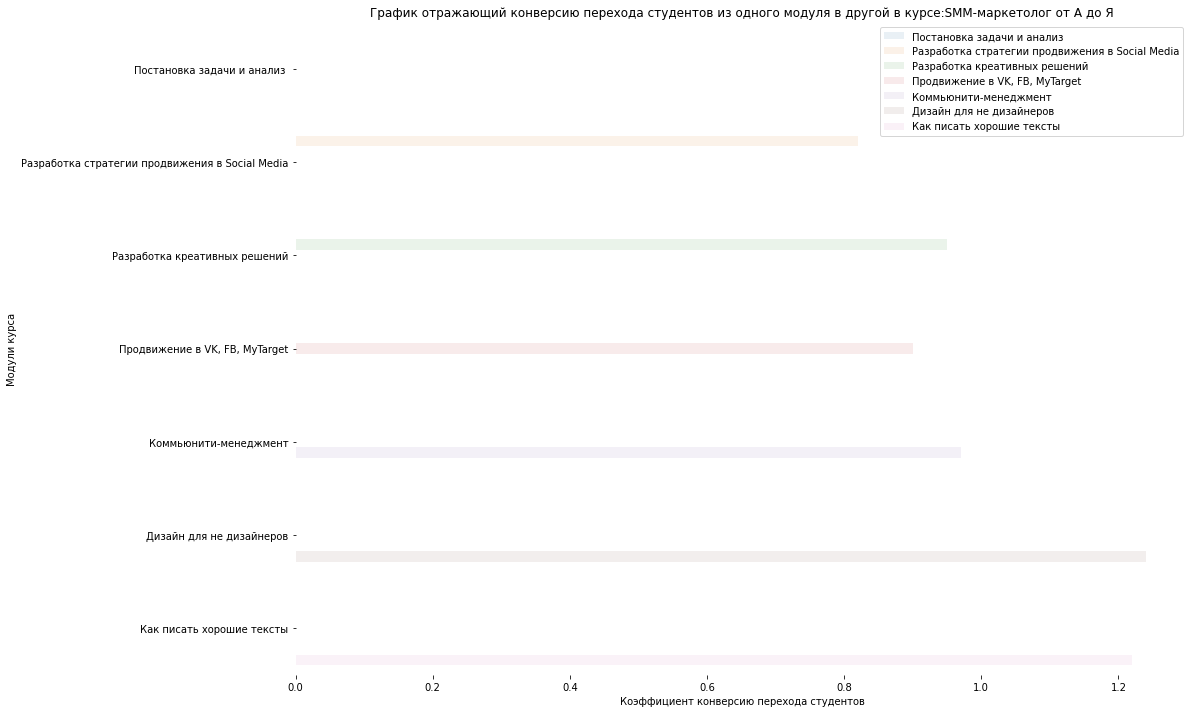

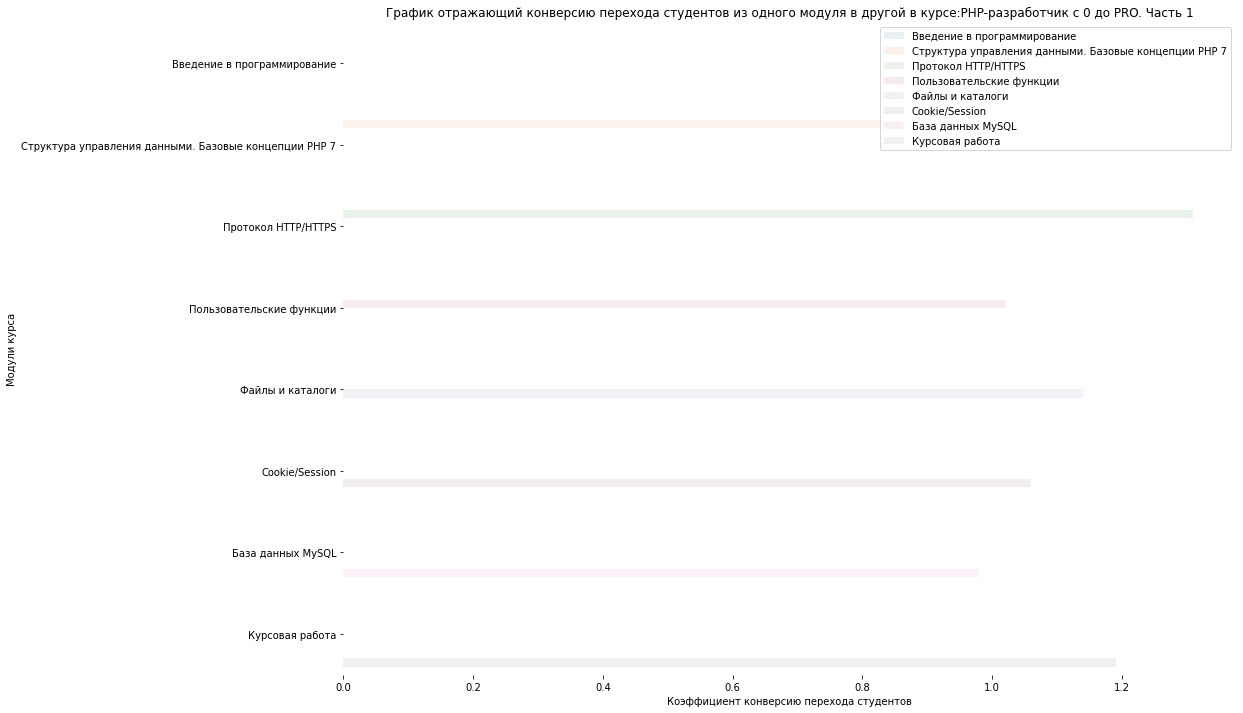

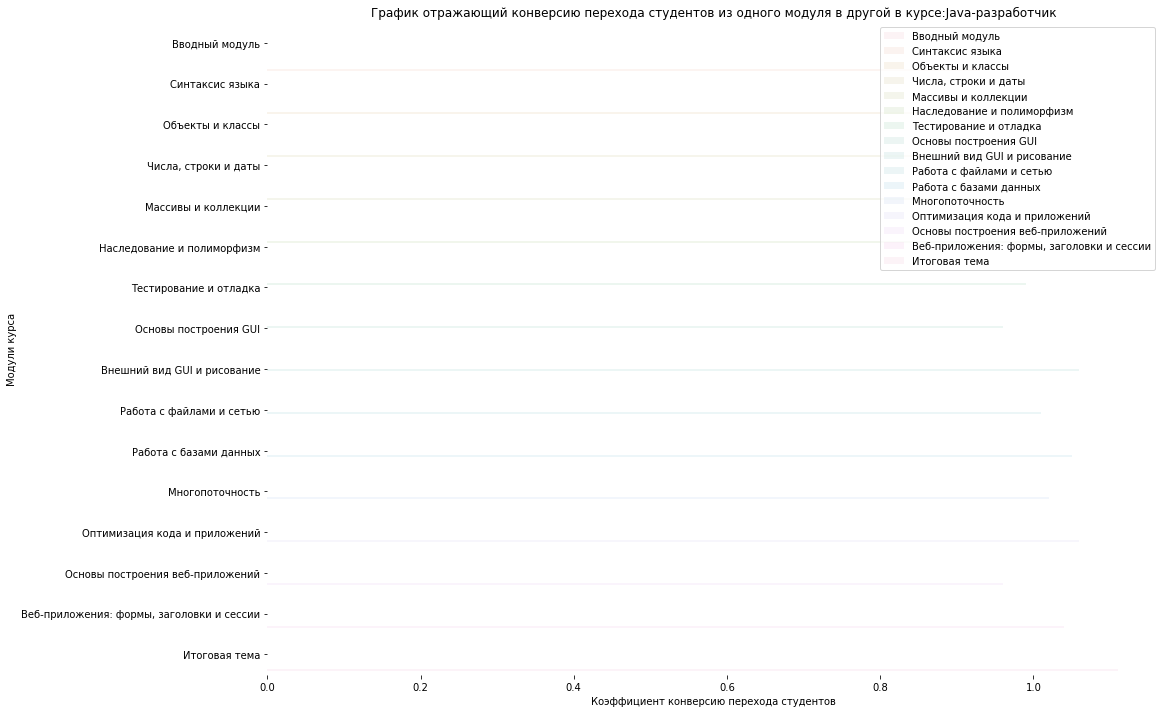

In [ ]:
import seaborn as sns
for title in all_title:
  data_12 = data_3[data_3['title'] == title].reset_index()
  fix, ax = plt.subplots(figsize = (16,12))
  ax = sns.barplot(x = data_12.percent, y = data_12.module_title,hue = data_12.module_title,alpha=0.1)
  ax.set_title('График отражающий конверсию перехода студентов из одного модуля в другой в курсе:'+title)
  ax.set_xlabel('Коэффициент конверсию перехода студентов')
  ax.set_ylabel('Модули курса')
  plt.legend()
  plt.box(on=None)
  plt.show()



# По данным графикам я могу сделать вывод, что все курсы кроме "UX-дизайн" не отличаються по показателям и по модулям
# Я пришел к выводу, что все курсы кроме "UX-дизайн" были сделаны по одному шаблону 